# BITS F464 - Semester 1 - MACHINE LEARNING

## ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES

### Team number: 24

#### Full names of all students in the team:
Pavas Garg, Tushar Raghani, Rohan Pothireddy, Kolasani Amit Vishnu

#### Id number of all students in the team:
 2021A7PS2587H, 2021A7PS1404H, 2021A7PS0365H, 2021A7PS0151H

# 1. Preprocess and perform exploratory data analysis of the dataset obtained

## ```Importing The Libraries```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## ```Importing the Dataset```

In [2]:
df = pd.read_csv("communities.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


# ```1. 🔬Preprocessing of Dataset```

In [3]:
# regular expression model
import re

# Read the .names file
with open('communities.names', 'r') as file:
    names_content = file.read()

# Find the start and end positions of the attribute names
start_pos = names_content.find('@attribute') + len('@attribute')
end_pos = names_content.find('@data')

# Extract the attribute names section
attributes_section = names_content[start_pos:end_pos]

# Split the attribute names into a list
attributes_list = [line.split()[1] for line in attributes_section.split('\n') if line.strip()]

# Special handling for the first attribute to ensure correct extraction
first_attribute_line = names_content[names_content.find('@attribute'):names_content.find('\n', names_content.find('@attribute'))]
first_attribute_name = re.search('@attribute\s+(\S+)\s', first_attribute_line).group(1)
attributes_list[0] = first_attribute_name

# Print the extracted attribute names
print("Attribute Names:")
print(attributes_list)

Attribute Names:
['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10'

In [4]:
# adding attribute names for the dataset
attribute_names = attributes_list
df.columns = attribute_names

print("Number of observations in this dataset are: ", len(df))
print("Number of features in this dataset are: ", len(df.columns)-1)
df.head()

Number of observations in this dataset are:  1994
Number of features in this dataset are:  127


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [5]:
# understanding the given data
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# to suppress specific warning 
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)

# ```Missing Values```

In [7]:
# replacing missing values represented by ? by NA
df.replace('?', pd.NA, inplace=True)

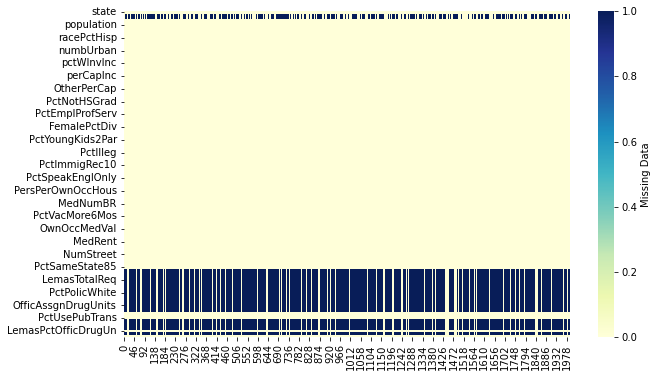

In [8]:
# heatmap for missing data visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.show()

In [9]:
# printing columns which have null values
[col for col in df.columns if df[col].isnull().any()]

['county',
 'community',
 'OtherPerCap',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [10]:
# Set the threshold for null values 
threshold = 1000

# Count null values in each column
missing_values = df.isna().sum()
print("Count of missing values:")
print(missing_values[missing_values > 0])

# Filter columns that exceed the threshold
columns_to_drop = missing_values[missing_values > threshold].index

# Display columns with null values exceeding the threshold
print("\nColumns with null values exceeding 1000:")
print(columns_to_drop)

# Drop columns exceeding the threshold
df = df.drop(columns=columns_to_drop)

Count of missing values:
county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

Columns with null values exceeding 1000:
Index(['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop',
       'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop'

In [11]:
# function to replace NULL values with mean
def replace_with_mean(df,feature,mean):
   df[feature].fillna(mean,inplace=True)

In [12]:
# checking null count
null_count = df.isnull().sum().sum()
print("NULL count: ",null_count)

NULL count:  1


In [13]:
# printing features with missing values
missing_values = df.isna().sum()
print(missing_values[missing_values>0])

OtherPerCap    1
dtype: int64


In [14]:
# We see that the column OtherPerCap has only one missing value, so we replace it with the mean
mean_value = pd.to_numeric(df['OtherPerCap'], errors='coerce').mean()
replace_with_mean(df,'OtherPerCap',mean_value)

In [15]:
null_count = df.isnull().sum().sum()
print("NULL count: ",null_count)

NULL count:  0


# ```Categorical Variables```

In [16]:
# checking for categorical features
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
print(len(categorical_columns))

2


In [17]:
categorical_columns

Index(['communityname', 'OtherPerCap'], dtype='object')

In [18]:
# checking community name feature
df['communityname'].value_counts()

Greenvillecity      5
Jacksonvillecity    5
Auburncity          5
Athenscity          4
Springfieldcity     4
                   ..
RedondoBeachcity    1
GrantsPasscity      1
FortWorthcity       1
Raleighcity         1
Ontariocity         1
Name: communityname, Length: 1828, dtype: int64

In [19]:
# as we can see that community name doesn't play important role in predicting crime rate so we can drop it
df = df.drop('communityname',axis=1)

In [20]:
type_of_values = [type(val) for val in df["OtherPerCap"]]
print(type_of_values[:5])

[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


In [21]:
# converting string type to float
df["OtherPerCap"] = [float(val) for val in df["OtherPerCap"]]
df["OtherPerCap"]

0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1994, dtype: float64

In [22]:
df.shape

(1994, 103)

# ```Correlation Matrix```

- This correlation matrix shows top 10 features which are highly correlated with target feature.

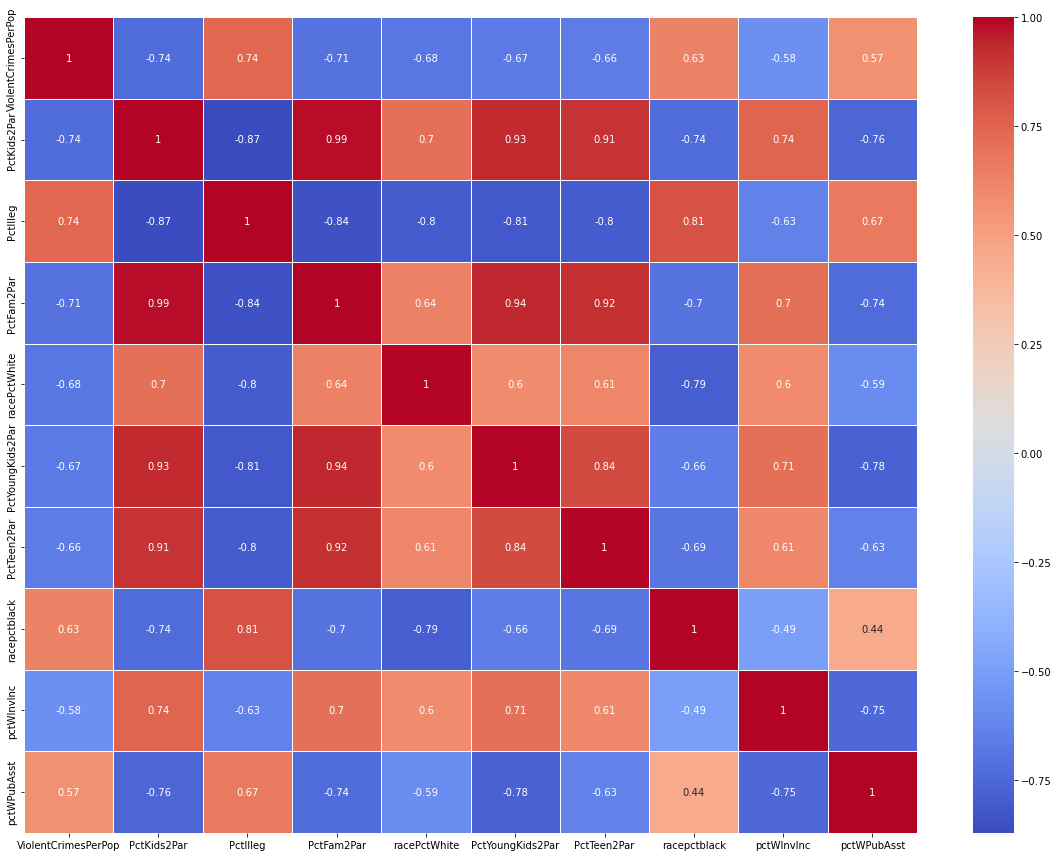

In [23]:
# correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()
plt.subplots(figsize=(20,15))

# finding correlation with target attribute
correlation_with_target = correlation_matrix["ViolentCrimesPerPop"]

# sort features according to correlation 
sorted_features = correlation_with_target.abs().sort_values(ascending=False)
top_n_features = sorted_features.index[:10]
subset_df = df[top_n_features]

sns.heatmap(subset_df.corr(), cmap="coolwarm", annot=True, linewidths=.5)
plt.show()

## ```Plotting Correlation Graphs for Strongly Related Features```

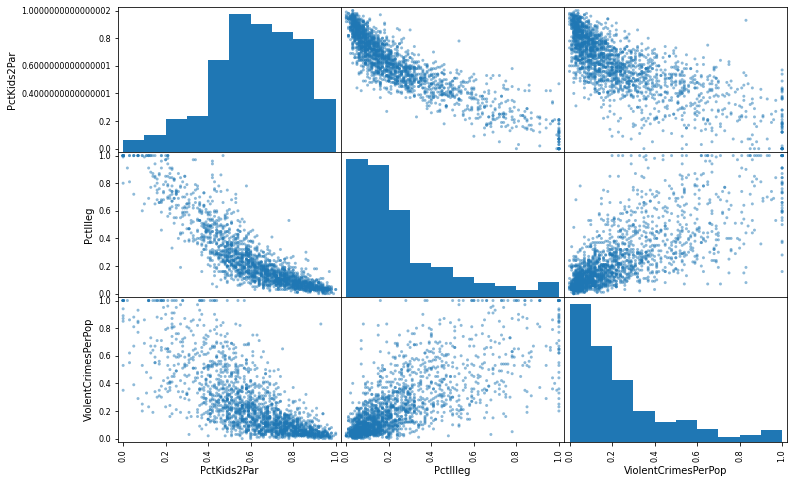

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["PctKids2Par","PctIlleg","ViolentCrimesPerPop"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

# ```Discretizing continuous target variable```

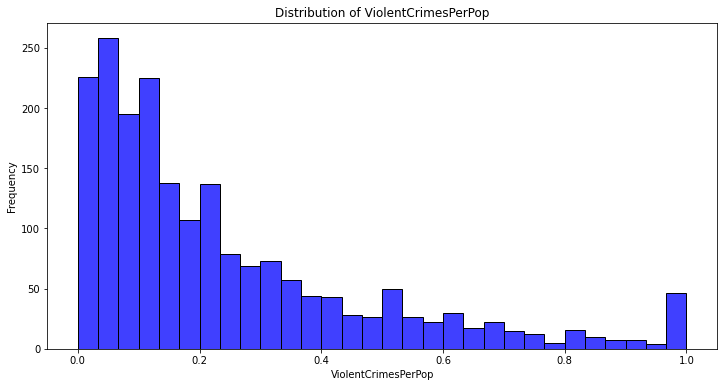

In [25]:
target_variable = df.columns[-1]

# Plot the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(df[target_variable], bins=30, kde=False, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.title('Distribution of {}'.format(target_variable))

# Show the plot
plt.show()

Converting target label "ViolentCrimesPerPop" to discrete class labels

We will make 4 classes 

- ViolentCrimesPerPop less than or equal to 0.25 will belong to class label "low"
- ViolentCrimesPerPop greater than 0.25 and less than or equal to 0.5  will belong to class label "medium"
- ViolentCrimesPerPop greater than 0.5 and less than or equal to 0.75  will belong to class label "high"
- ViolentCrimesPerPop greater than 0.75 and less than or equal to 1 will belong to class label "very high"

In [26]:
# we will do label encoding for target variable
crime_rate_values = np.array(df["ViolentCrimesPerPop"])

for ind in range(len(crime_rate_values)):
    if crime_rate_values[ind] <= 0.25:
        crime_rate_values[ind] = 1
    elif crime_rate_values[ind] > 0.25 and crime_rate_values[ind] <= 0.5:
        crime_rate_values[ind] = 2
    elif crime_rate_values[ind] > 0.5 and crime_rate_values[ind] <= 0.75:
        crime_rate_values[ind] = 3
    else:
        crime_rate_values[ind] = 4
        
df["ViolentCrimesPerPop"] = crime_rate_values

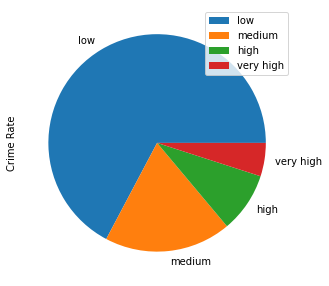

In [27]:
# plotting pie chart for target attribute
crime_rate = df["ViolentCrimesPerPop"]

categories = ["low","medium","high","very high"]
frequency_crime_rate = [0,0,0,0]

for val in crime_rate:
    if val == 1:
        frequency_crime_rate[0] += 1
    elif val == 2:
        frequency_crime_rate[1] += 1
    elif val == 3:
        frequency_crime_rate[2] += 1
    elif val == 4:
        frequency_crime_rate[3] += 1
        
dictionary = dict(zip(categories, frequency_crime_rate))

# plotting pie chart
df_crime_rate = pd.DataFrame({'Crime Rate': frequency_crime_rate,},index=categories)
plot = df_crime_rate.plot.pie(y='Crime Rate', figsize=(5, 5))

# ```Visualizing Class Imbalance```

In [28]:
df["ViolentCrimesPerPop"].value_counts()

1.0    1341
2.0     376
3.0     178
4.0      99
Name: ViolentCrimesPerPop, dtype: int64

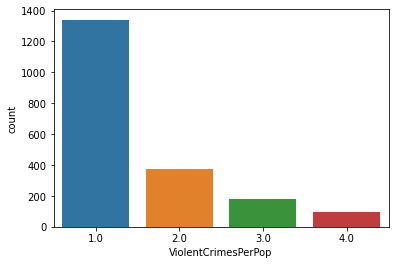

In [29]:
sns.countplot(x = 'ViolentCrimesPerPop',data = df)
plt.show()

```Here we can observe that number of samples in dataset for very high crime rate is much less than number of samples which correspond to low crime rate, hence there is class imbalance.```

# ```Train-Test Split```

In [30]:
def split_train_test(data,test_ratio):
    # np.random.seed() is very important as whenever we call the function it will randomly divide the indices
    # it might happen after many calls our model sees all the data and it leads to overfitting so to prevent it
    # seed function will randomly divide data only once and once the function is called it will not give other
    # permuatation of indices whenever called again,hence no overfitting
    np.random.seed(45)
    # it will give random permutation of indices from 0 to len(data)-1
    # now shuffled array will contain random number for eg [0,4,1,99,12,3...]
    shuffled = np.random.permutation(len(data))  
    test_set_size = int(len(data)*test_ratio)
    # it will give array of indices from index 0 to test_set_size-1
    test_indices = shuffled[:test_set_size]
    # it will give array of indices from index test_set_size till last
    train_indices = shuffled[test_set_size:]
    # it will return rows from data df corresponding to indices given in train and test indices array
    # so it is returning the train and test data respectively
    return data.iloc[train_indices], data.iloc[test_indices]

In [31]:
train_set, test_set = split_train_test(df,0.2)

In [32]:
train_set.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
619,6,4,0.05,0.51,0.04,0.64,1.00,0.10,0.38,0.32,...,0.69,0.34,0.72,0.77,0.65,0.04,0.25,0.05,0.0,1.0
1808,29,10,0.05,0.32,0.94,0.22,0.13,0.02,0.37,0.47,...,0.18,0.60,0.65,0.54,0.66,0.01,0.57,0.27,0.0,2.0
1644,21,9,0.02,0.49,0.38,0.60,0.25,0.07,0.53,0.67,...,0.21,0.24,0.24,0.21,0.00,0.03,0.16,0.01,0.0,1.0
881,45,5,0.00,0.51,0.20,0.83,0.04,0.03,0.40,0.52,...,0.06,0.62,0.53,0.59,0.51,0.01,0.18,0.01,0.0,1.0
1510,41,8,0.16,0.43,0.03,0.87,0.15,0.11,0.38,0.48,...,0.16,0.43,0.32,0.44,0.52,0.12,0.22,0.14,1.0,1.0


In [33]:
len(train_set)

1596

In [34]:
test_set.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
710,21,4,0.01,0.37,0.01,0.99,0.02,0.00,0.32,0.38,...,0.02,0.65,0.72,0.77,0.72,0.01,0.24,0.28,0.00,1.0
1091,34,6,0.07,0.58,0.22,0.59,0.05,0.44,0.44,0.49,...,0.17,0.58,0.69,0.77,0.78,0.20,0.07,0.10,0.77,2.0
39,34,1,0.01,0.14,0.21,0.67,0.61,0.07,0.18,0.69,...,0.45,0.35,0.04,0.00,0.01,0.03,0.10,0.53,0.00,1.0
9,29,1,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,1.0
1607,6,9,0.04,1.00,0.07,0.45,0.48,1.00,0.62,0.70,...,1.00,0.46,0.58,0.83,0.71,0.01,0.89,0.29,0.00,3.0


In [35]:
len(test_set)

398

In [36]:
# changing indexing to 0 based indexing
train_set.index = range(len(train_set))
train_set

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,6,4,0.05,0.51,0.04,0.64,1.00,0.10,0.38,0.32,...,0.69,0.34,0.72,0.77,0.65,0.04,0.25,0.05,0.0,1.0
1,29,10,0.05,0.32,0.94,0.22,0.13,0.02,0.37,0.47,...,0.18,0.60,0.65,0.54,0.66,0.01,0.57,0.27,0.0,2.0
2,21,9,0.02,0.49,0.38,0.60,0.25,0.07,0.53,0.67,...,0.21,0.24,0.24,0.21,0.00,0.03,0.16,0.01,0.0,1.0
3,45,5,0.00,0.51,0.20,0.83,0.04,0.03,0.40,0.52,...,0.06,0.62,0.53,0.59,0.51,0.01,0.18,0.01,0.0,1.0
4,41,8,0.16,0.43,0.03,0.87,0.15,0.11,0.38,0.48,...,0.16,0.43,0.32,0.44,0.52,0.12,0.22,0.14,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,56,8,0.01,0.29,0.00,0.97,0.03,0.04,0.40,0.36,...,0.05,0.45,0.49,0.63,0.57,0.02,0.15,0.00,0.0,1.0
1592,6,10,0.02,1.00,0.01,0.48,0.32,1.00,0.66,0.75,...,1.00,0.41,0.59,0.84,0.74,0.01,0.60,0.27,0.0,3.0
1593,42,9,0.00,0.53,0.01,0.95,0.20,0.01,0.43,0.37,...,0.26,0.82,0.93,0.71,0.89,0.02,0.13,0.30,0.0,1.0
1594,34,3,0.02,0.59,0.14,0.83,0.16,0.07,0.58,0.68,...,0.12,0.63,0.35,0.43,0.67,0.26,0.02,0.09,0.0,1.0


In [37]:
# changing indexing to 0 based indexing
test_set.index = range(len(test_set))
test_set

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,21,4,0.01,0.37,0.01,0.99,0.02,0.00,0.32,0.38,...,0.02,0.65,0.72,0.77,0.72,0.01,0.24,0.28,0.00,1.0
1,34,6,0.07,0.58,0.22,0.59,0.05,0.44,0.44,0.49,...,0.17,0.58,0.69,0.77,0.78,0.20,0.07,0.10,0.77,2.0
2,34,1,0.01,0.14,0.21,0.67,0.61,0.07,0.18,0.69,...,0.45,0.35,0.04,0.00,0.01,0.03,0.10,0.53,0.00,1.0
3,29,1,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,1.0
4,6,9,0.04,1.00,0.07,0.45,0.48,1.00,0.62,0.70,...,1.00,0.46,0.58,0.83,0.71,0.01,0.89,0.29,0.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,23,9,0.00,1.00,0.01,0.95,0.11,0.02,1.00,1.00,...,0.14,0.48,0.07,0.00,0.21,0.05,0.05,0.06,0.00,1.0
394,55,8,0.00,0.27,0.00,1.00,0.02,0.00,0.34,0.40,...,0.04,0.80,0.61,0.76,0.79,0.01,0.21,0.00,0.00,1.0
395,8,1,0.34,0.35,0.22,0.73,0.23,0.12,0.37,0.52,...,0.16,0.29,0.34,0.30,0.38,0.39,0.14,0.23,0.61,3.0
396,48,3,0.00,0.62,0.30,0.42,0.02,0.72,0.52,0.53,...,0.33,0.69,0.46,0.79,0.85,0.03,0.08,0.01,0.00,1.0


# ```Handling Data Imbalance```

Methods to handle data imbalance are:
- Undersampling the majority class
- Oversampling the minority class (by duplicating items)
- Oversampling minority class (using SMOTE - Synthetic Minority Oversamping Technique, by K Nearest Neighbors algorithm)
- Ensemble Method 
- Focal Loss

#### SMOTE (Synthetic Minority Oversampling Technique)

- It aims to balance class distribution by randomly increasing minority class examples by replicating them.
- SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. 
- These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.
- SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.


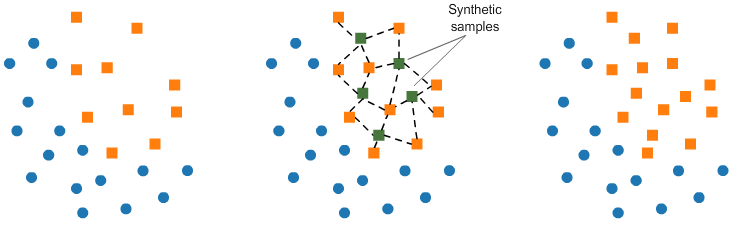

In [38]:
train_set["ViolentCrimesPerPop"].value_counts()

1.0    1071
2.0     307
3.0     136
4.0      82
Name: ViolentCrimesPerPop, dtype: int64

# ```Imbalanced Train Data```

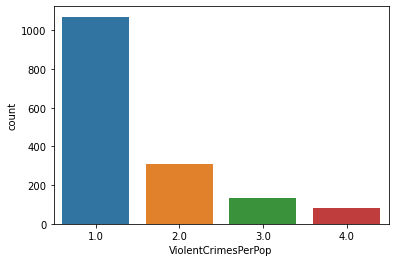

In [39]:
sns.countplot(x='ViolentCrimesPerPop',data = train_set)
plt.show()

In [40]:
pip install imblearn


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import collections
x = train_set.drop(columns='ViolentCrimesPerPop')
y = train_set["ViolentCrimesPerPop"]
counter = collections.Counter(y)
print(counter.items())

dict_items([(1.0, 1071), (2.0, 307), (3.0, 136), (4.0, 82)])


In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smt, y_smt = smote.fit_resample(x,y)
y_smt = pd.DataFrame(y_smt)

In [43]:
# updating the train_set, to a balanced train_set after using smote
train_set_smote = pd.concat([x_smt,y_smt],axis=1)
train_set = train_set_smote
print(len(train_set))

4284


In [44]:
train_set

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,6,4,0.050000,0.510000,0.040000,0.640000,1.000000,0.100000,0.380000,0.320000,...,0.690000,0.340000,0.720000,0.770000,0.650000,0.040000,0.250000,0.050000,0.000000,1.0
1,29,10,0.050000,0.320000,0.940000,0.220000,0.130000,0.020000,0.370000,0.470000,...,0.180000,0.600000,0.650000,0.540000,0.660000,0.010000,0.570000,0.270000,0.000000,2.0
2,21,9,0.020000,0.490000,0.380000,0.600000,0.250000,0.070000,0.530000,0.670000,...,0.210000,0.240000,0.240000,0.210000,0.000000,0.030000,0.160000,0.010000,0.000000,1.0
3,45,5,0.000000,0.510000,0.200000,0.830000,0.040000,0.030000,0.400000,0.520000,...,0.060000,0.620000,0.530000,0.590000,0.510000,0.010000,0.180000,0.010000,0.000000,1.0
4,41,8,0.160000,0.430000,0.030000,0.870000,0.150000,0.110000,0.380000,0.480000,...,0.160000,0.430000,0.320000,0.440000,0.520000,0.120000,0.220000,0.140000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,12,3,0.013445,0.377895,0.538293,0.495518,0.038963,0.352010,0.314115,0.432042,...,0.490670,0.262408,0.378995,0.631738,0.504848,0.018963,0.201037,0.134482,0.000000,4.0
4280,12,4,0.025954,0.235861,0.626326,0.479069,0.030837,0.106651,0.229628,0.330465,...,0.397023,0.258838,0.500419,0.687488,0.591256,0.025489,0.211674,0.166420,0.025117,4.0
4281,11,6,0.551534,0.277254,0.791017,0.256479,0.072003,0.100000,0.290258,0.446009,...,0.351745,0.284006,0.536753,0.638498,0.434491,0.123005,0.578271,0.620032,0.711228,4.0
4282,1,4,0.014564,0.450000,0.825235,0.276711,0.060973,0.000000,0.459127,0.497382,...,0.031846,0.849900,0.617181,0.792618,0.769027,0.097382,0.110672,0.055336,0.000000,4.0


# ```Balanced Train Data```

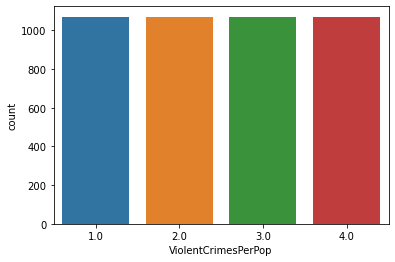

In [45]:
# now we have balanced train_set
sns.countplot(x='ViolentCrimesPerPop',data = train_set)
plt.show()

## ```Box Plots for checking correlation between numerical features and target```

- Box-plot interpretation, these plots gives us idea about distribution of numerical features for each of the classes in target variable, if the distribution looks similar that means the numerical feature has no effect on target variable, hence numerical feature is not correlated to target feature.


- We can see that for feature "PctBornSameState" rectangular boxes are in similar lines. It means whether the crime rate was low or high is not effected by this feature.


- Whereas for features "PctKids2Par" and "PctIlleg" we can see that rectangular boxes are in different lines, which affect the crime rate.


- We will find which all features to drop after performing ANOVA Test.

In [46]:
def make_box_plot(dataset,feature):    
    low_crime_rate = dataset[dataset['ViolentCrimesPerPop'] == 1][feature]
    medium_crime_rate = dataset[dataset['ViolentCrimesPerPop'] == 2][feature]
    high_crime_rate = dataset[dataset['ViolentCrimesPerPop'] == 3][feature]
    very_high_crime_rate = dataset[dataset['ViolentCrimesPerPop'] == 4][feature]
    
    fig = plt.figure(figsize =(7,6))
    fig = plt.figure(figsize =(7,6))
    fig, ax1 = plt.subplots(figsize=(7, 6))
    ax1.yaxis.grid(True, linestyle='-', which='major', color='grey',alpha=0.5)
    
    plt.boxplot([low_crime_rate, medium_crime_rate, high_crime_rate, very_high_crime_rate], labels=['low', 'medium', 'high', 'very high'],vert=True)
    plt.ylabel(feature)
    plt.title(f"Boxplot of {feature} for ViolentCrimesPerPop")
    plt.show()

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

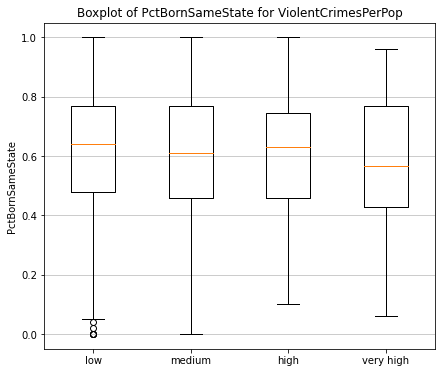

In [47]:
make_box_plot(train_set,"PctBornSameState")

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

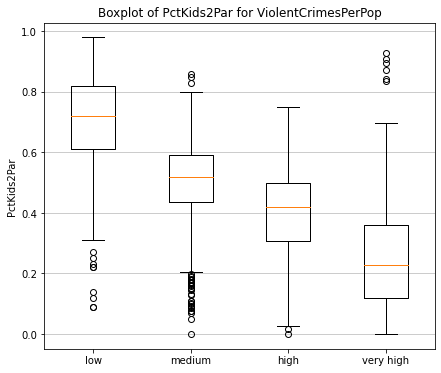

In [48]:
make_box_plot(train_set,"PctKids2Par")

<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

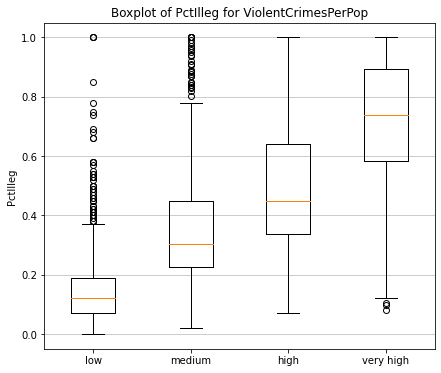

In [49]:
make_box_plot(train_set,"PctIlleg")

# ```Feature Selection```

# ANOVA Test

ANOVA (Analysis of Variance) Test is used for feature selection when input variables are numerical and output variable is categorical.

The variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa.

F-Distribution is a probability distribution generally used for the analysis of variance.

H0: Two variances are equal

H1: Two variances are not equal

F-value is the ratio of two Chi-distributions divided by its degrees of Freedom.

\begin{equation}
\ F = (\chi^2_{1}/n_{1}-1) / (\chi^2_{2}/n_{2}-1)
\end{equation}

where $\chi^2_{1}$ and $\chi^2_{2}$ are chi distributions and $n_{1}$, $n_{2}$ are its respective degrees of freedom

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as

H0: Means of all groups are equal (There is no relation between the given variables as the mean values of the numeric Predictor variable is same for all the groups in the categorical target variable)

H1: At least one mean of the groups are different (There is some relation between given variables)

```SST``` represents the total variation in the data. It is calculated as the sum of the squared differences between each data point and the overall mean of the data.

<center>SST $= \sum(y_{i} - 𝑦̄)^2 $ </center>

```SSB``` represents the variation between different groups or categories in your data. It is calculated as the sum of the squared differences between the group means and the overall mean, weighted by the number of data points in each group.

<br>
<center>SSB $= \sum(n_{j}(𝑦̄_{j} - 𝑦̄)^2) $ </center>

```SSE``` represents the variation within each group or category. It is calculated as the sum of the squared differences between individual data points and their respective group means.

<center> SSE $= \sum\sum((y_{ij} - 𝑦̄_{j})^2) $ </center>


In [50]:
# defining anova function
def anova_feature_selection(X,y):
    n_features = X.shape[1]
    f_scores = [] # intializing array to store f value for each feature
    
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    # to find value of f score for each feature
    for i in range(n_features):
        # feature_values is a column vector
        feature_values = [X.iloc[j][i] for j in range(X.shape[0])]
        
        ssb = 0
        sse = 0
        
        for c in unique_classes:
            # it will take datapoints belonging to class c, lets say n_j points
            class_values = []
            for j in range(len(y)):
                if y[j] == c:
                    class_values.append(feature_values[j])
                    
            # calculating class mean for class c
            class_mean = np.mean(class_values)
            
            # class size as n_j
            class_size = len(class_values)
            
            sse += np.sum([(x-class_mean)**2 for x in class_values])
            ssb += class_size * (class_mean - np.mean(feature_values))**2
        
        # for handling the case when division is undefined 0/0 form
        if sse == 0:
            epsilon = 1e-6
            sse += epsilon
            
        f_scores.append((ssb/(n_classes-1))/(sse/(X.shape[0]-n_classes)))
    
    return f_scores

In [51]:
x = train_set.drop(columns='ViolentCrimesPerPop')
y = train_set["ViolentCrimesPerPop"]
print("Number of numerical features before applying ANOVA test is: ",len(x.columns))

Number of numerical features before applying ANOVA test is:  102


In [52]:
# this will give f-score values for all features
f_scores = anova_feature_selection(x,y)
f_scores[:10]

[76.58118946860183,
 23.36058581072567,
 132.81366019612457,
 4.350315701538942,
 1117.506807059188,
 1428.9402263284135,
 3.3633478962063603,
 92.47510547333113,
 16.40125476728194,
 46.7918024053763]

In [53]:
import json
f_scores = pd.Series(f_scores,index=x.columns)
f_scores_dict = {}
for ind in range(len(f_scores)):
    f_scores_dict[train_set.columns[ind]] = f_scores[ind]
f_scores_dict = dict(sorted(f_scores_dict.items(), key = lambda x: x[1], reverse = True))
print(json.dumps(f_scores_dict, indent = 4))

{
    "PctKids2Par": 2062.6734998552074,
    "PctIlleg": 1889.802749004127,
    "PctFam2Par": 1776.5628939077963,
    "PctTeen2Par": 1430.4483492699953,
    "racePctWhite": 1428.9402263284135,
    "PctYoungKids2Par": 1392.2221322583669,
    "racepctblack": 1117.506807059188,
    "pctWInvInc": 1001.7729522959864,
    "FemalePctDiv": 886.9795748438911,
    "TotalPctDiv": 851.7572031101333,
    "pctWPubAsst": 803.1168632008253,
    "PctPopUnderPov": 758.7820816022087,
    "PctPersOwnOccup": 737.6645872597893,
    "MalePctDivorce": 700.8895663451862,
    "PctUnemployed": 636.019835560002,
    "PctVacantBoarded": 611.738703586488,
    "PctNotHSGrad": 571.0478392979596,
    "medFamInc": 568.5812276901389,
    "PctHousOwnOcc": 565.1810009027955,
    "medIncome": 509.9706000846388,
    "PctHousNoPhone": 499.6131433027497,
    "PctHousLess3BR": 498.76561988545416,
    "MalePctNevMarr": 346.72694964814536,
    "perCapInc": 344.2742656596153,
    "PctLess9thGrade": 341.3734908638974,
    "NumIlle

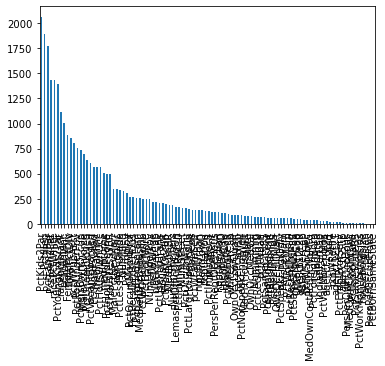

In [54]:
# plot showing f values for numerical features
f_scores.sort_values(ascending=False,inplace =True)
f_scores.plot.bar()
plt.show()

### According to ANOVA test we reject H0 if 

\begin{equation}
F_{\text{observed}}  \ge  F_{\text{critical}}
\end{equation}

where, 
\begin{equation}
F_{\text{critical}} \space\space  \text{is calculated by taking degree of freedom as k-1,n-k where k is the number of classes (k=4) at level of significance ${\alpha}$ = 0.05}
\end{equation}

\begin{equation}
F_{\text{critical}} \space\space  \text{comes out to be 2.6069}
\end{equation}

so for features where,

\begin{equation}
F_{\text{observed}} \space\space  \text{is greater than or equal to 2.6069 are included, rest of the features are dropped}
\end{equation}

In [55]:
# so features with high f values are included,
# and we drop features which have f values less than 2.6069
count_of_drop_features = 0
for f_val in f_scores:
    if f_val < 2.6069:
        count_of_drop_features += 1
        
print("Number of features that should be dropped are:",count_of_drop_features)

Number of features that should be dropped are: 1


In [56]:
num_features_included = len(f_scores) - count_of_drop_features
f_scores = f_scores[:num_features_included]
print("Number of numerical features remaining after applying f test are:",len(f_scores))

Number of numerical features remaining after applying f test are: 101


In [57]:
train_set_new = pd.DataFrame()

columns_to_copy = []
# including remaining numerical features
count = 0
for feature in f_scores_dict:
    if count == num_features_included:
        break
    columns_to_copy.append(feature)
    count += 1

train_set_new = pd.concat([train_set[columns_to_copy].copy(),train_set["ViolentCrimesPerPop"]],axis=1)
train_set = train_set_new
print(train_set.shape)
features_after_f_test = train_set.columns
features_after_f_test

(4284, 102)


Index(['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'PctTeen2Par', 'racePctWhite',
       'PctYoungKids2Par', 'racepctblack', 'pctWInvInc', 'FemalePctDiv',
       'TotalPctDiv',
       ...
       'agePct65up', 'PersPerOwnOccHous', 'MedOwnCostPctInc', 'PctEmplManu',
       'PctSameState85', 'PctWorkMomYoungKids', 'householdsize',
       'racePctAsian', 'PersPerOccupHous', 'ViolentCrimesPerPop'],
      dtype='object', length=102)

In [58]:
train_set

,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
0,0.890000,0.060000,0.900000,0.830000,0.640000,0.920000,0.040000,0.840000,0.290000,0.270000,...,0.390000,0.530000,0.490000,0.480000,0.650000,0.100000,0.510000,1.000000,0.550000,1.0
1,0.380000,0.630000,0.380000,0.350000,0.220000,0.660000,0.940000,0.560000,0.640000,0.590000,...,0.430000,0.460000,0.320000,0.290000,0.660000,0.670000,0.320000,0.130000,0.340000,2.0
2,0.610000,0.130000,0.630000,0.470000,0.600000,0.650000,0.380000,0.340000,0.530000,0.520000,...,0.140000,0.590000,0.510000,0.100000,0.000000,0.460000,0.490000,0.250000,0.540000,1.0
3,0.750000,0.130000,0.720000,0.700000,0.830000,0.850000,0.200000,0.410000,0.520000,0.510000,...,0.200000,0.590000,0.260000,0.840000,0.510000,0.810000,0.510000,0.040000,0.540000,1.0
4,0.550000,0.250000,0.510000,0.490000,0.870000,0.510000,0.030000,0.500000,0.720000,0.780000,...,0.460000,0.380000,0.400000,0.250000,0.520000,0.510000,0.430000,0.150000,0.350000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.160335,0.828932,0.175853,0.049298,0.495518,0.144482,0.538293,0.313812,0.724482,0.806220,...,0.556252,0.266523,0.653477,0.104147,0.504848,0.428995,0.377895,0.038963,0.391340,4.0
4280,0.114977,0.702977,0.134139,0.000000,0.479069,0.134139,0.626326,0.384558,0.724605,0.860419,...,0.723255,0.160465,0.760372,0.142093,0.591256,0.544558,0.235861,0.030837,0.234605,4.0
4281,0.080743,0.838513,0.118740,0.132989,0.256479,0.257739,0.791017,0.450743,0.656753,0.726252,...,0.618983,0.275008,0.495493,0.107496,0.434491,0.587254,0.277254,0.072003,0.241502,4.0
4282,0.353691,0.535637,0.372819,0.363792,0.276711,0.350873,0.825235,0.247382,0.616309,0.623591,...,0.431645,0.477282,0.171544,0.604966,0.769027,0.875537,0.450000,0.060973,0.464564,4.0


In [59]:
features_after_f_test

Index(['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'PctTeen2Par', 'racePctWhite',
       'PctYoungKids2Par', 'racepctblack', 'pctWInvInc', 'FemalePctDiv',
       'TotalPctDiv',
       ...
       'agePct65up', 'PersPerOwnOccHous', 'MedOwnCostPctInc', 'PctEmplManu',
       'PctSameState85', 'PctWorkMomYoungKids', 'householdsize',
       'racePctAsian', 'PersPerOccupHous', 'ViolentCrimesPerPop'],
      dtype='object', length=102)

# ``Outlier Detection``

### What is an Outlier?

- A data point which is significantly far from other data points
- Inter-Quartile Range Method to remove Outliers (IQR)
- IQR = Q3 - Q1
- Upper_Limit = Q3 + 1.5*IQR
- Lower_Limit = Q1 - 1.5*IQR

In [60]:
def plot_boxplot(dataframe,feature):
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    dataframe.boxplot(column=[feature],flierprops = red_circle,showmeans=True,meanprops=mean_shape,notch=True)
    plt.grid(False)
    plt.show()

## ```Plotting Individual Box Plots```

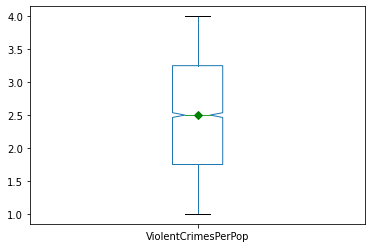

In [61]:
plot_boxplot(train_set,"ViolentCrimesPerPop")

## ```Plotting Box Plot for multiple features (before outlier removal)```

In [62]:
# plotting box plots for first 8 features
def plot_boxplot_multiple_features():
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    fig,axis = plt.subplots(1,len(train_set.iloc[:,:8].select_dtypes(include='number').columns),figsize=(20,10))
    for i,ax in enumerate(axis.flat):
        ax.boxplot(train_set.iloc[:,:8].select_dtypes(include='number').iloc[:,i],flierprops=red_circle,showmeans=True,meanprops=mean_shape,notch=True)
        ax.set_title(train_set.iloc[:,:8].select_dtypes(include='number').columns[i][0:20]+"..",fontsize=15,fontweight=20)
        ax.tick_params(axis='y',labelsize=14)

    plt.tight_layout()

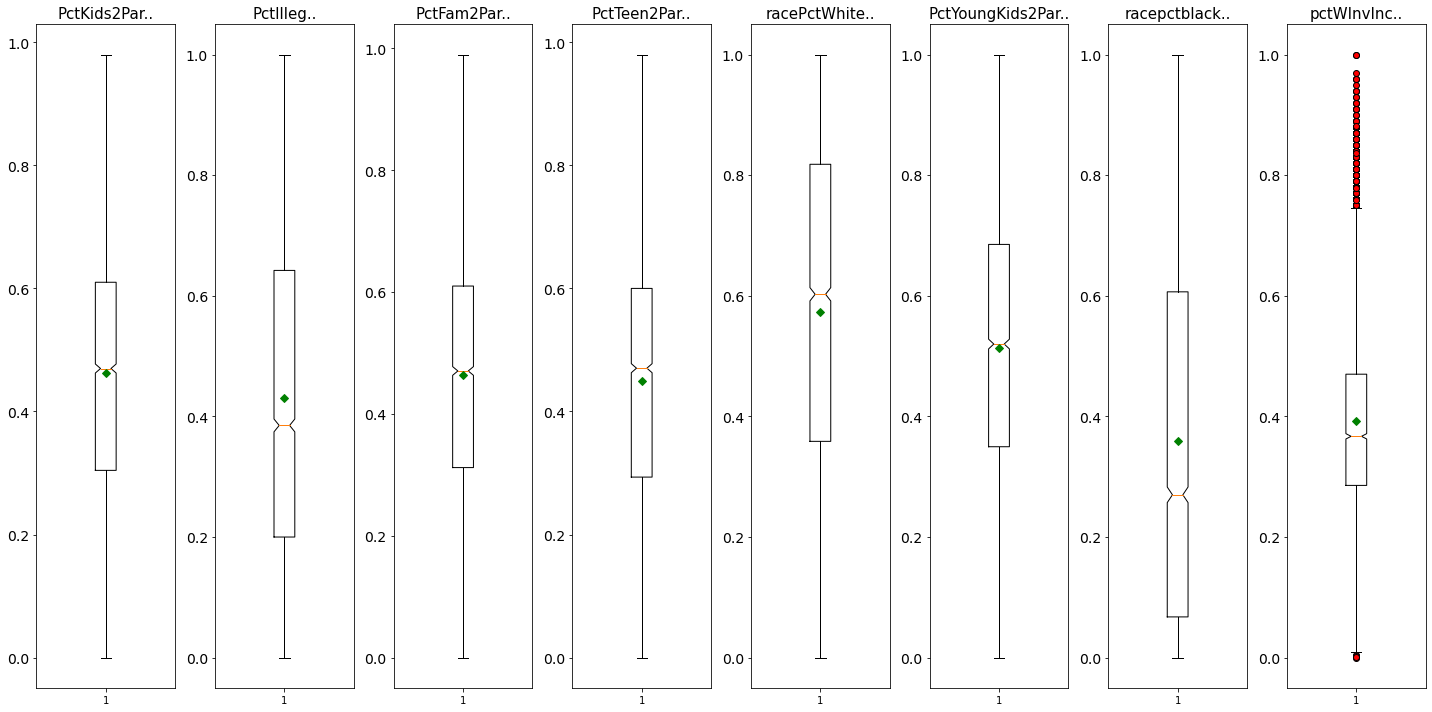

In [63]:
# red circles are the outliers 
plot_boxplot_multiple_features()

In [64]:
train_set

,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
0,0.890000,0.060000,0.900000,0.830000,0.640000,0.920000,0.040000,0.840000,0.290000,0.270000,...,0.390000,0.530000,0.490000,0.480000,0.650000,0.100000,0.510000,1.000000,0.550000,1.0
1,0.380000,0.630000,0.380000,0.350000,0.220000,0.660000,0.940000,0.560000,0.640000,0.590000,...,0.430000,0.460000,0.320000,0.290000,0.660000,0.670000,0.320000,0.130000,0.340000,2.0
2,0.610000,0.130000,0.630000,0.470000,0.600000,0.650000,0.380000,0.340000,0.530000,0.520000,...,0.140000,0.590000,0.510000,0.100000,0.000000,0.460000,0.490000,0.250000,0.540000,1.0
3,0.750000,0.130000,0.720000,0.700000,0.830000,0.850000,0.200000,0.410000,0.520000,0.510000,...,0.200000,0.590000,0.260000,0.840000,0.510000,0.810000,0.510000,0.040000,0.540000,1.0
4,0.550000,0.250000,0.510000,0.490000,0.870000,0.510000,0.030000,0.500000,0.720000,0.780000,...,0.460000,0.380000,0.400000,0.250000,0.520000,0.510000,0.430000,0.150000,0.350000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.160335,0.828932,0.175853,0.049298,0.495518,0.144482,0.538293,0.313812,0.724482,0.806220,...,0.556252,0.266523,0.653477,0.104147,0.504848,0.428995,0.377895,0.038963,0.391340,4.0
4280,0.114977,0.702977,0.134139,0.000000,0.479069,0.134139,0.626326,0.384558,0.724605,0.860419,...,0.723255,0.160465,0.760372,0.142093,0.591256,0.544558,0.235861,0.030837,0.234605,4.0
4281,0.080743,0.838513,0.118740,0.132989,0.256479,0.257739,0.791017,0.450743,0.656753,0.726252,...,0.618983,0.275008,0.495493,0.107496,0.434491,0.587254,0.277254,0.072003,0.241502,4.0
4282,0.353691,0.535637,0.372819,0.363792,0.276711,0.350873,0.825235,0.247382,0.616309,0.623591,...,0.431645,0.477282,0.171544,0.604966,0.769027,0.875537,0.450000,0.060973,0.464564,4.0


In [65]:
# function to return list of indices which are outliers for that feature
def find_outlier_IQR(dataframe,feature):
    q1 = dataframe[feature].quantile(0.25)
    q3 = dataframe[feature].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    outlier_indices = dataframe.index[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)]
    return outlier_indices

In [66]:
# creating a list to store indices of outliers, for all features
outlier_index_list = []
for feature in train_set.select_dtypes(include='number').columns:
    # skipping the target variable
    if feature == "ViolentCrimesPerPop":
        continue
    outlier_index_list.extend(find_outlier_IQR(train_set.select_dtypes(include='number'),feature))

In [67]:
# checking the outlier list
print(len(set(outlier_index_list)))
print(outlier_index_list[:10])

3238
[0, 12, 29, 53, 73, 74, 80, 82, 83, 102]


In [68]:
# function to remove outliers and which will return a clean datafram without the outliers
def remove_outliers(dataframe,outlier_index_list):
    outlier_index_list = sorted(set(outlier_index_list)) # use a set to remove duplicate values of indices
    dataframe = dataframe.drop(outlier_index_list)
    return dataframe

In [69]:
print(len(train_set))

4284


In [70]:
train_set = remove_outliers(train_set,outlier_index_list)

In [71]:
# checking the len after outlier removal
print(len(train_set))

1046


## ```Plotting Box Plot for multiple features (after outlier removal)```

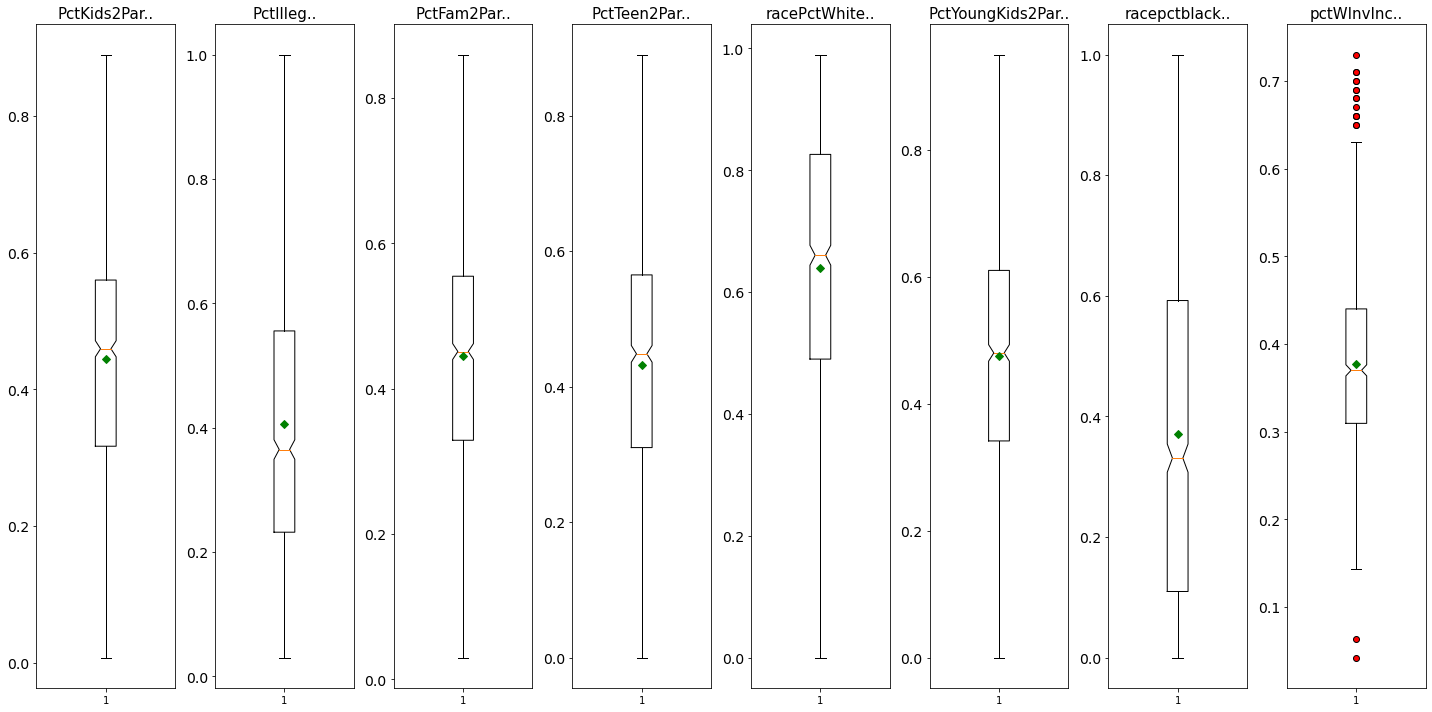

In [72]:
plot_boxplot_multiple_features() # we can observe the difference now

In [73]:
train_set.shape

(1046, 102)

In [74]:
train_set.head()

,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
22,0.52,0.24,0.46,0.59,0.96,0.57,0.02,0.47,0.70,0.69,...,0.42,0.38,0.30,0.14,0.59,0.61,0.35,0.06,0.29,1.0
27,0.69,0.16,0.64,0.70,0.96,0.68,0.02,0.54,0.43,0.44,...,0.54,0.37,0.17,0.44,0.80,0.84,0.31,0.03,0.30,2.0
28,0.49,0.09,0.47,0.42,0.92,0.50,0.01,0.41,0.73,0.76,...,0.60,0.31,0.31,0.29,0.49,0.52,0.31,0.09,0.33,1.0
34,0.67,0.17,0.69,0.67,0.82,0.84,0.20,0.43,0.38,0.42,...,0.40,0.60,0.46,0.39,0.75,0.32,0.53,0.07,0.55,1.0
38,0.38,0.48,0.42,0.43,0.61,0.38,0.48,0.31,0.62,0.65,...,0.47,0.43,0.32,0.84,0.76,0.56,0.42,0.04,0.44,3.0


# ```Feature Scaling```

### Standardization Method
- Standardization is performed to transform the data to have a mean of 0 and standard deviation of 1
- Standardization is also known as Z-Score Normalization

\begin{equation}
z = \frac{(x-\mu)}{\sigma}
\end{equation}

In [75]:
# function for finding mean of a feature in a given dataset
def find_mean(dataset,feature):
    n = len(dataset[feature])
    sum = 0
    for val in dataset[feature]:
        sum += val
    return sum/n

In [76]:
# function for finding standard deviation of a feature in a given dataset
def find_standard_deviation(dataset,feature):
    variance, squared_sum = 0,0
    n = len(dataset[feature])
    mean = find_mean(dataset,feature)
    for val in dataset[feature]:
        squared_sum += (val-mean)**2
    variance = squared_sum/n
    return math.sqrt(variance)

In [77]:
# function for scaling a feature in given dataset
def standardize_feature(dataset,feature,mean_value,standard_deviation_value):
    # to check if mean and standard deviation values are given incase of test dataset or have to be calculated for train dataset
    if mean_value == -1:
        mean_value = find_mean(dataset,feature)
    if standard_deviation_value == -1:
        standard_deviation_value = find_standard_deviation(dataset,feature)

    standardized_feature = []
    for val in dataset[feature]:
        if standard_deviation_value == 0:
            standard_deviation_value = 1e6
        standardized_feature.append((val-mean_value)/standard_deviation_value)
    return standardized_feature, mean_value, standard_deviation_value

In [78]:
# function for scaling (standardizing) the whole dataset
def standardize_dataset(dataset,mean_array,standard_deviation_array):
    standardized_df = pd.DataFrame()
    mean_calculated = []
    standard_deviation_calculated = []
    for ind in range(len(dataset.columns)):
        standardized_result, m, sd = standardize_feature(dataset,dataset.columns[ind],mean_array[ind],standard_deviation_array[ind])
        standardized_df[dataset.columns[ind]] = standardized_result
        mean_calculated.append(m)
        standard_deviation_calculated.append(sd)
    return standardized_df, mean_calculated, standard_deviation_calculated

# ```Plot showing distribution of features before standardization```

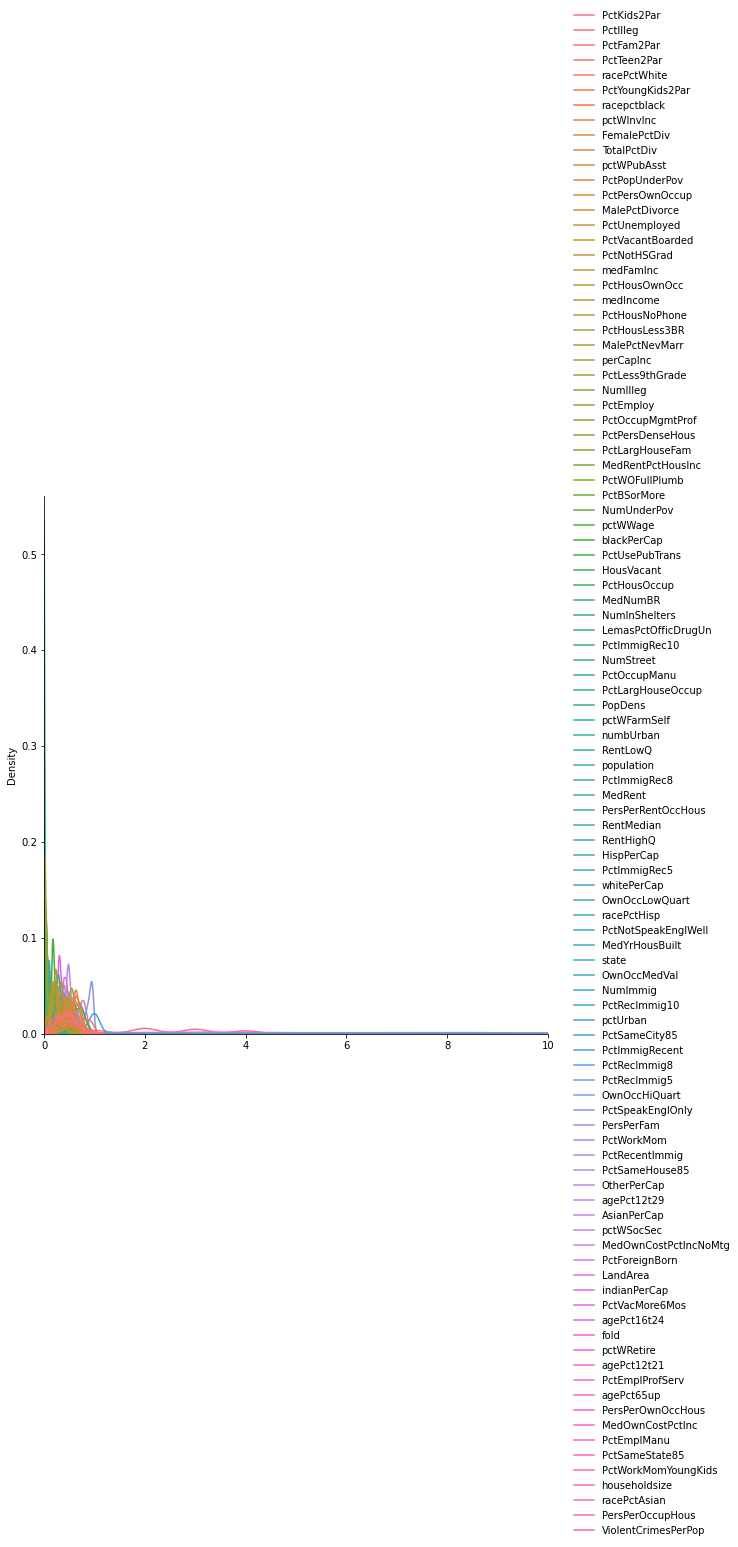

In [79]:
x_axis_limits = (0,10)
sns.displot(train_set.select_dtypes(include='number'), kind='kde',aspect=1,height=8,warn_singular=False,facet_kws={'xlim': x_axis_limits})
plt.show()

# ```Standardizing the train dataset```

In [80]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [81]:
# standardizing the train dataset
train_set_new = train_set.select_dtypes(include='number')
train_set_new = train_set_new.drop(columns = ['ViolentCrimesPerPop'])
train_mean_array = [-1 for i in range(len(train_set_new.columns))]
train_standard_deviation_array = [-1 for i in range(len(train_set_new.columns))]
train_set_new, mean_calculated, standard_deviation_calculated = standardize_dataset(train_set_new,train_mean_array,train_standard_deviation_array)
train_set_new

/var/folders/69/1b088435637d6qzmvv7zpycm0000gn/T/ipykernel_29795/2610170990.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  standardized_df[dataset.columns[ind]] = standardized_result


,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,PctEmplProfServ,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous
0,0.438410,-0.748501,0.091621,0.917361,1.428624,0.490924,-1.230789,0.949375,0.839613,0.495841,...,2.529675,-0.471361,-0.412119,-0.573126,-1.614711,-0.604877,0.572230,-0.683134,-0.155657,-1.225162
1,1.428034,-1.109890,1.187933,1.556774,1.428624,1.061555,-1.230789,1.668515,-1.712400,-1.717155,...,1.059748,0.464444,-0.508141,-1.445463,0.055288,0.865189,2.256639,-1.126059,-0.599047,-1.125328
2,0.263770,-1.426106,0.152527,-0.070822,1.249895,0.127794,-1.265819,0.332970,1.123170,1.115480,...,0.324785,0.932346,-1.084274,-0.506023,-0.779711,-1.304909,-0.086886,-1.126059,0.287733,-0.825823
3,1.311607,-1.064717,1.492464,1.382389,0.803070,1.891565,-0.600240,0.538439,-2.184995,-1.894195,...,-1.145142,-0.627329,1.700369,0.500519,-0.223045,0.515173,-1.551590,1.310028,-0.007860,1.370547
4,-0.376574,0.335666,-0.152004,-0.012694,-0.135263,-0.494713,0.380615,-0.694372,0.083461,0.141762,...,-1.696365,-0.081443,0.067992,-0.438920,2.281954,0.585177,0.206054,0.091985,-0.451250,0.272362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,-1.788567,0.826012,-1.815525,-1.774731,-0.546857,-1.621810,0.794349,0.010279,1.634906,1.698462,...,-0.042697,1.839291,-1.715394,-0.220176,-0.742434,-0.529011,0.369300,-1.183128,-0.660249,-1.135439
1042,-1.371703,1.017621,-1.326396,-1.449515,-0.531849,-1.635976,0.718896,-0.081205,1.037590,1.303681,...,0.448190,1.634064,-1.804356,-0.367587,-1.419926,-1.158405,0.080233,-1.143318,-0.566692,-1.081617
1043,-1.655313,1.911917,-1.639009,-2.225653,-0.646795,-1.716479,0.584819,-0.655214,1.071012,1.524618,...,-1.284342,0.591180,-1.501746,1.798803,-1.814295,-1.200966,-0.753363,-0.374248,-0.466571,-0.213434
1044,-0.529726,0.586999,-0.439368,-0.397553,-1.624482,-0.645813,1.589992,-1.337670,0.048573,-0.092013,...,1.451279,-0.380552,0.522003,-1.435101,0.973596,0.648368,2.516892,0.424178,-0.141276,0.517594


In [82]:
# checking mean and variance of each feature after standardizing the train dataset
for feature in train_set_new:
    print("Mean of",feature,"is",round(find_mean(train_set_new,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(train_set_new,feature)))

Mean of PctKids2Par is 0
Standard Deviation of PctKids2Par is 1
Mean of PctIlleg is 0
Standard Deviation of PctIlleg is 1
Mean of PctFam2Par is 0
Standard Deviation of PctFam2Par is 1
Mean of PctTeen2Par is 0
Standard Deviation of PctTeen2Par is 1
Mean of racePctWhite is 0
Standard Deviation of racePctWhite is 1
Mean of PctYoungKids2Par is 0
Standard Deviation of PctYoungKids2Par is 1
Mean of racepctblack is 0
Standard Deviation of racepctblack is 1
Mean of pctWInvInc is 0
Standard Deviation of pctWInvInc is 1
Mean of FemalePctDiv is 0
Standard Deviation of FemalePctDiv is 1
Mean of TotalPctDiv is 0
Standard Deviation of TotalPctDiv is 1
Mean of pctWPubAsst is 0
Standard Deviation of pctWPubAsst is 1
Mean of PctPopUnderPov is 0
Standard Deviation of PctPopUnderPov is 1
Mean of PctPersOwnOccup is 0
Standard Deviation of PctPersOwnOccup is 1
Mean of MalePctDivorce is 0
Standard Deviation of MalePctDivorce is 1
Mean of PctUnemployed is 0
Standard Deviation of PctUnemployed is 1
Mean of Pc

# ```Plot showing distribution of features after standardization```

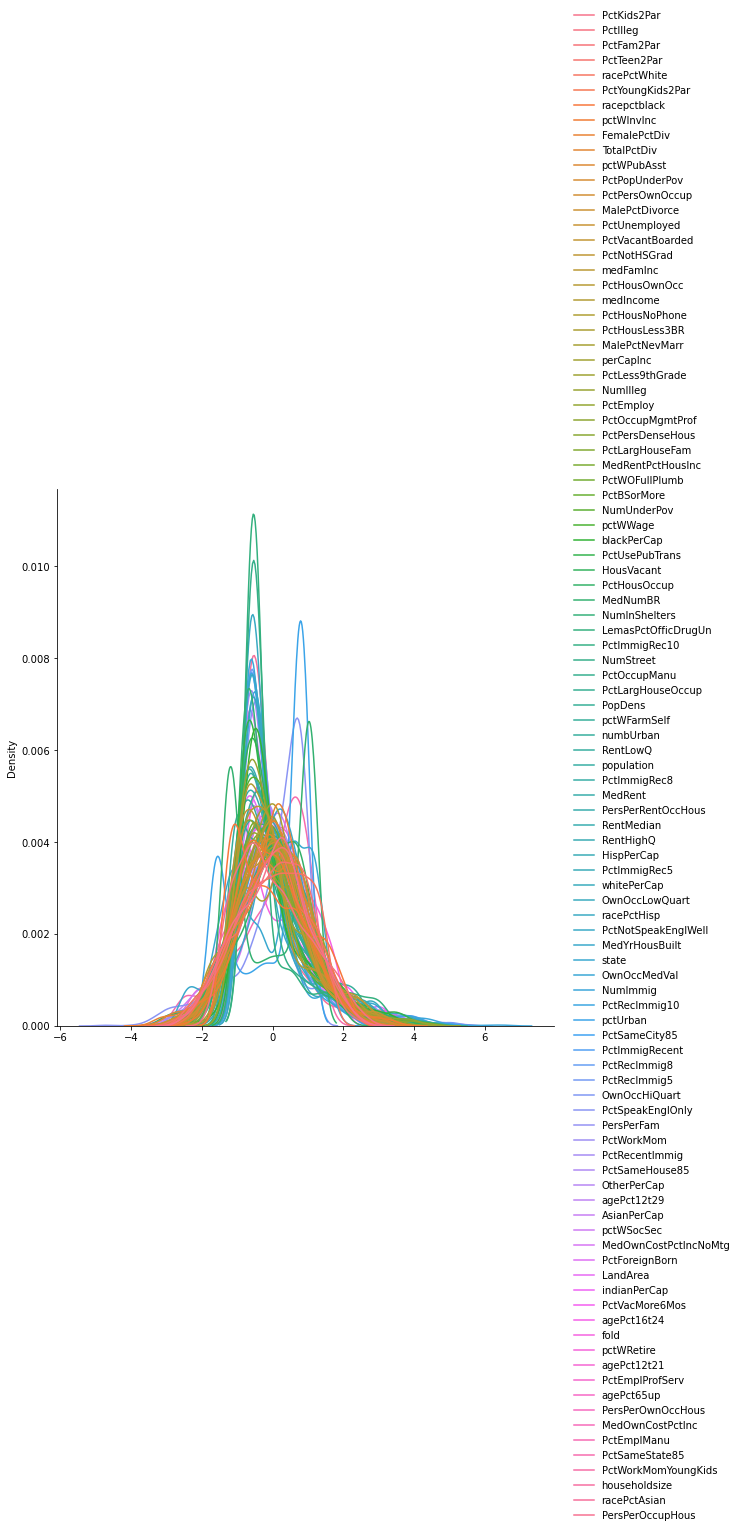

In [83]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(train_set_new, kind='kde',aspect=1,height=8)
plt.show()

In [84]:
# replacing standardized features with original features in train_set dataframe
train_set_new.index = train_set.index
train_set_new["ViolentCrimesPerPop"] = train_set["ViolentCrimesPerPop"]
train_set = train_set_new
train_set

,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
22,0.438410,-0.748501,0.091621,0.917361,1.428624,0.490924,-1.230789,0.949375,0.839613,0.495841,...,-0.471361,-0.412119,-0.573126,-1.614711,-0.604877,0.572230,-0.683134,-0.155657,-1.225162,1.0
27,1.428034,-1.109890,1.187933,1.556774,1.428624,1.061555,-1.230789,1.668515,-1.712400,-1.717155,...,0.464444,-0.508141,-1.445463,0.055288,0.865189,2.256639,-1.126059,-0.599047,-1.125328,2.0
28,0.263770,-1.426106,0.152527,-0.070822,1.249895,0.127794,-1.265819,0.332970,1.123170,1.115480,...,0.932346,-1.084274,-0.506023,-0.779711,-1.304909,-0.086886,-1.126059,0.287733,-0.825823,1.0
34,1.311607,-1.064717,1.492464,1.382389,0.803070,1.891565,-0.600240,0.538439,-2.184995,-1.894195,...,-0.627329,1.700369,0.500519,-0.223045,0.515173,-1.551590,1.310028,-0.007860,1.370547,1.0
38,-0.376574,0.335666,-0.152004,-0.012694,-0.135263,-0.494713,0.380615,-0.694372,0.083461,0.141762,...,-0.081443,0.067992,-0.438920,2.281954,0.585177,0.206054,0.091985,-0.451250,0.272362,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,-1.788567,0.826012,-1.815525,-1.774731,-0.546857,-1.621810,0.794349,0.010279,1.634906,1.698462,...,1.839291,-1.715394,-0.220176,-0.742434,-0.529011,0.369300,-1.183128,-0.660249,-1.135439,4.0
4275,-1.371703,1.017621,-1.326396,-1.449515,-0.531849,-1.635976,0.718896,-0.081205,1.037590,1.303681,...,1.634064,-1.804356,-0.367587,-1.419926,-1.158405,0.080233,-1.143318,-0.566692,-1.081617,4.0
4279,-1.655313,1.911917,-1.639009,-2.225653,-0.646795,-1.716479,0.584819,-0.655214,1.071012,1.524618,...,0.591180,-1.501746,1.798803,-1.814295,-1.200966,-0.753363,-0.374248,-0.466571,-0.213434,4.0
4282,-0.529726,0.586999,-0.439368,-0.397553,-1.624482,-0.645813,1.589992,-1.337670,0.048573,-0.092013,...,-0.380552,0.522003,-1.435101,0.973596,0.648368,2.516892,0.424178,-0.141276,0.517594,4.0


## ```Dimensionality Reduction using PCA (Principal Component Analysis)```

- It is used to reduce the dimensionality of dataset by transforming a large set into a lower dimensional set that still contains most of the information of the large dataset

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

- PCA finds a new set of dimensions such that all dimensions are orthogonal and hence linearly independent and ranked according to variance of data along them

- Eigen vectors point in direction of maximum variance among data, and eigen value gives the importance of that eigen vector

![PCA_Image](https://miro.medium.com/v2/resize:fit:1192/format:webp/1*QinDfRawRskupf4mU5bYSA.png)

In [85]:
# implementing PCA from scratch

# it will take dataset X and k components needed after PCA
def PCA(X,k):
    k_principal_components = [] # it will store first k eigen vectors
    mean = np.mean(X,axis=0)  # this will find mean for each row
    X = X - mean  # mean centering the data
    
    # finding the covariance matrix, will give a n*n matrix containing covariance of all features
    cov = np.cov(X.T)
    
    # finding eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # transpose eigenvector
    eigenvectors = eigenvectors.T
    
    # will give indexes according to eigen values, sorted in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]
    
    # for finding how much variance does each principal component capture
    explained_variance = eigenvalues / np.sum(eigenvalues)
    
    # slicing first k eigenvectors
    k_principal_components = eigenvectors[:k]
     
    # returning the transformed features
    # multiplyinh n*d matrix with d*k matrix to get transformed feature matrix of dimension n*k
    return np.dot(X,k_principal_components.T), explained_variance, k_principal_components

k = 36

# this will return the new dataset
train_set_pca, explained_variance, k_principal_components = PCA(train_set.drop(columns="ViolentCrimesPerPop"),k)
train_set_pca = pd.DataFrame(train_set_pca)
print("Shape of train_set is:", train_set.shape)
print("Shape of train_set_pca is:",train_set_pca.shape)

Shape of train_set is: (1046, 102)
Shape of train_set_pca is: (1046, 36)


In [86]:
train_set_pca

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-2.360998,1.846873,4.125858,0.507645,-2.278640,-0.518220,0.150925,0.144950,4.508038,-0.180128,...,-0.554171,0.002207,1.322325,-0.771820,0.732466,0.289585,-0.464614,-0.031889,0.489157,-0.563277
1,-1.447141,7.959853,0.922674,-0.871256,0.030290,-1.429054,-2.064173,1.794100,0.417099,-0.471323,...,0.872717,1.243561,0.517630,-0.218174,0.810080,-0.490150,0.672405,-0.692222,0.462897,0.688056
2,1.492029,2.875179,2.259540,-3.062838,2.815922,-1.848797,0.599792,-0.504557,2.327421,-1.287618,...,-2.038236,-0.570210,0.976081,0.280318,-0.089937,0.249401,-0.884998,-0.451410,0.098134,-0.478119
3,-7.443684,4.671614,-3.591262,3.252589,0.760099,1.552172,0.823751,-1.897255,-0.442370,-0.440361,...,1.387790,1.407829,1.100707,-0.043057,-1.250180,0.827358,0.006111,0.450254,-1.013972,-0.669085
4,1.447987,1.602728,-0.167608,0.227237,-1.506626,0.242809,2.333397,1.516306,-2.993963,2.054115,...,0.916786,-0.203612,-0.258402,0.363693,-0.424435,0.498379,0.221481,0.475149,-0.277897,-0.751703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,5.172223,-1.497303,4.050828,-0.934905,2.305401,-0.274013,-0.246995,-2.572875,-0.423348,0.429773,...,0.101364,-0.702673,0.388850,-0.371466,-0.354183,-0.896847,0.127361,0.951924,0.620853,-0.045800
1042,3.909755,-2.546775,4.609521,-2.184349,1.296757,-1.159601,-0.181275,-2.531743,-0.744737,-0.071476,...,-0.411335,0.195026,0.367630,-0.419564,0.028451,0.153631,-0.243060,-0.246992,-0.266218,0.567654
1043,1.732450,-10.730062,2.054287,-4.327002,5.929301,0.688839,-1.070643,0.517650,-1.646726,-0.283205,...,1.292358,0.696322,0.262708,-0.214811,0.687144,-0.733667,-0.475737,0.388969,-0.421262,0.572679
1044,2.798917,1.118305,-1.722834,-1.539517,-3.226729,2.049230,-1.029076,-0.025014,-2.961331,-1.155015,...,-0.766331,-0.805535,-0.556963,-0.012744,-0.424750,0.846999,0.650244,0.394127,-0.891372,0.339737


In [87]:
# plotting first two principal components
PC1 = train_set_pca[0]
PC2 = train_set_pca[1]

target = train_set["ViolentCrimesPerPop"]
label = ["low","medium","high","very high"]

labels = []
for points in target:
    labels.append(label[int(points)-1])
    
zipped = list(zip(PC1,PC2,target,labels))
pc_df = pd.DataFrame(zipped, columns=['PC1','PC2','Target','Label'])
pc_df

,PC1,PC2,Target,Label
0,-2.360998,1.846873,1.0,low
1,-1.447141,7.959853,2.0,medium
2,1.492029,2.875179,1.0,low
3,-7.443684,4.671614,1.0,low
4,1.447987,1.602728,3.0,high
...,...,...,...,...
1041,5.172223,-1.497303,4.0,very high
1042,3.909755,-2.546775,4.0,very high
1043,1.732450,-10.730062,4.0,very high
1044,2.798917,1.118305,4.0,very high


## ```Plot showing spread of data along first 2 Principal Components```

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


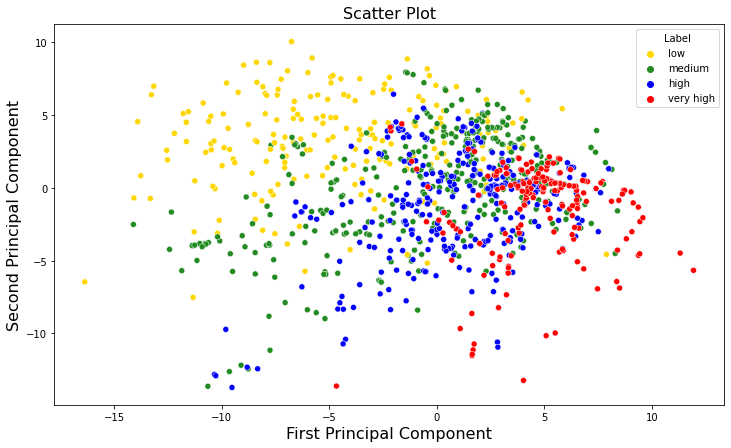

In [88]:
plt.figure(figsize=(12,7))
forest_green = (34/255, 139/255, 34/255)
gold = (255/255,215/255,0/255)
colors = [forest_green if label == 0 else gold for label in target]
sns.scatterplot(data=pc_df,x="PC1",y="PC2",hue="Label",palette={'low':gold,'medium':forest_green,'high':'blue',"very high":'red'})
plt.title("Scatter Plot",fontsize=16)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()

## ```Plot showing spread of data along first 3 Principal Components```

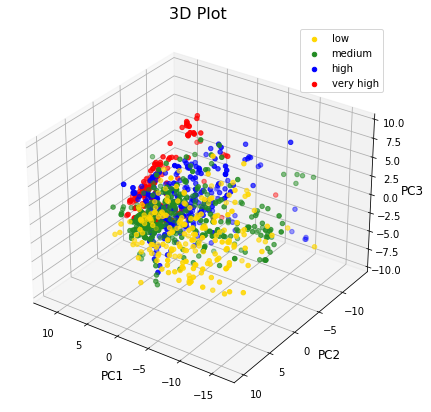

In [89]:
PC3 = train_set_pca[2]

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111,projection='3d')
 
for l in np.unique(target):
    ix = np.where(target==l)
    ix = np.asarray(ix)[0]
    ax.scatter(PC1[ix],PC2[ix],PC3[ix],label=label[int(l)-1],c=[gold if int(l) == 1 else forest_green if int(l) == 2 else 'blue' if int(l) == 3 else 'red'])

ax.set_xlabel("PC1",fontsize=12)
ax.set_ylabel("PC2",fontsize=12)
ax.set_zlabel("PC3",fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D Plot",fontsize=16)
plt.show()

## ```Plot showing variance captured by each Principal Component```

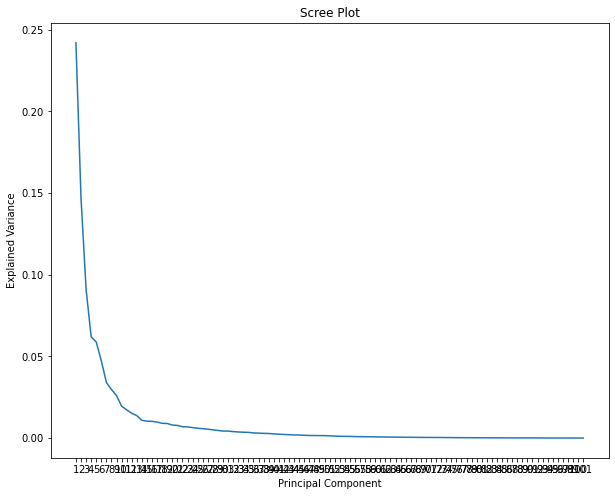

In [90]:
num_components = len(explained_variance)
components = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 8))
plt.plot(components, explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

## ```Plot to find out number of Principal Components needed inorder to capture 95% variance in data```

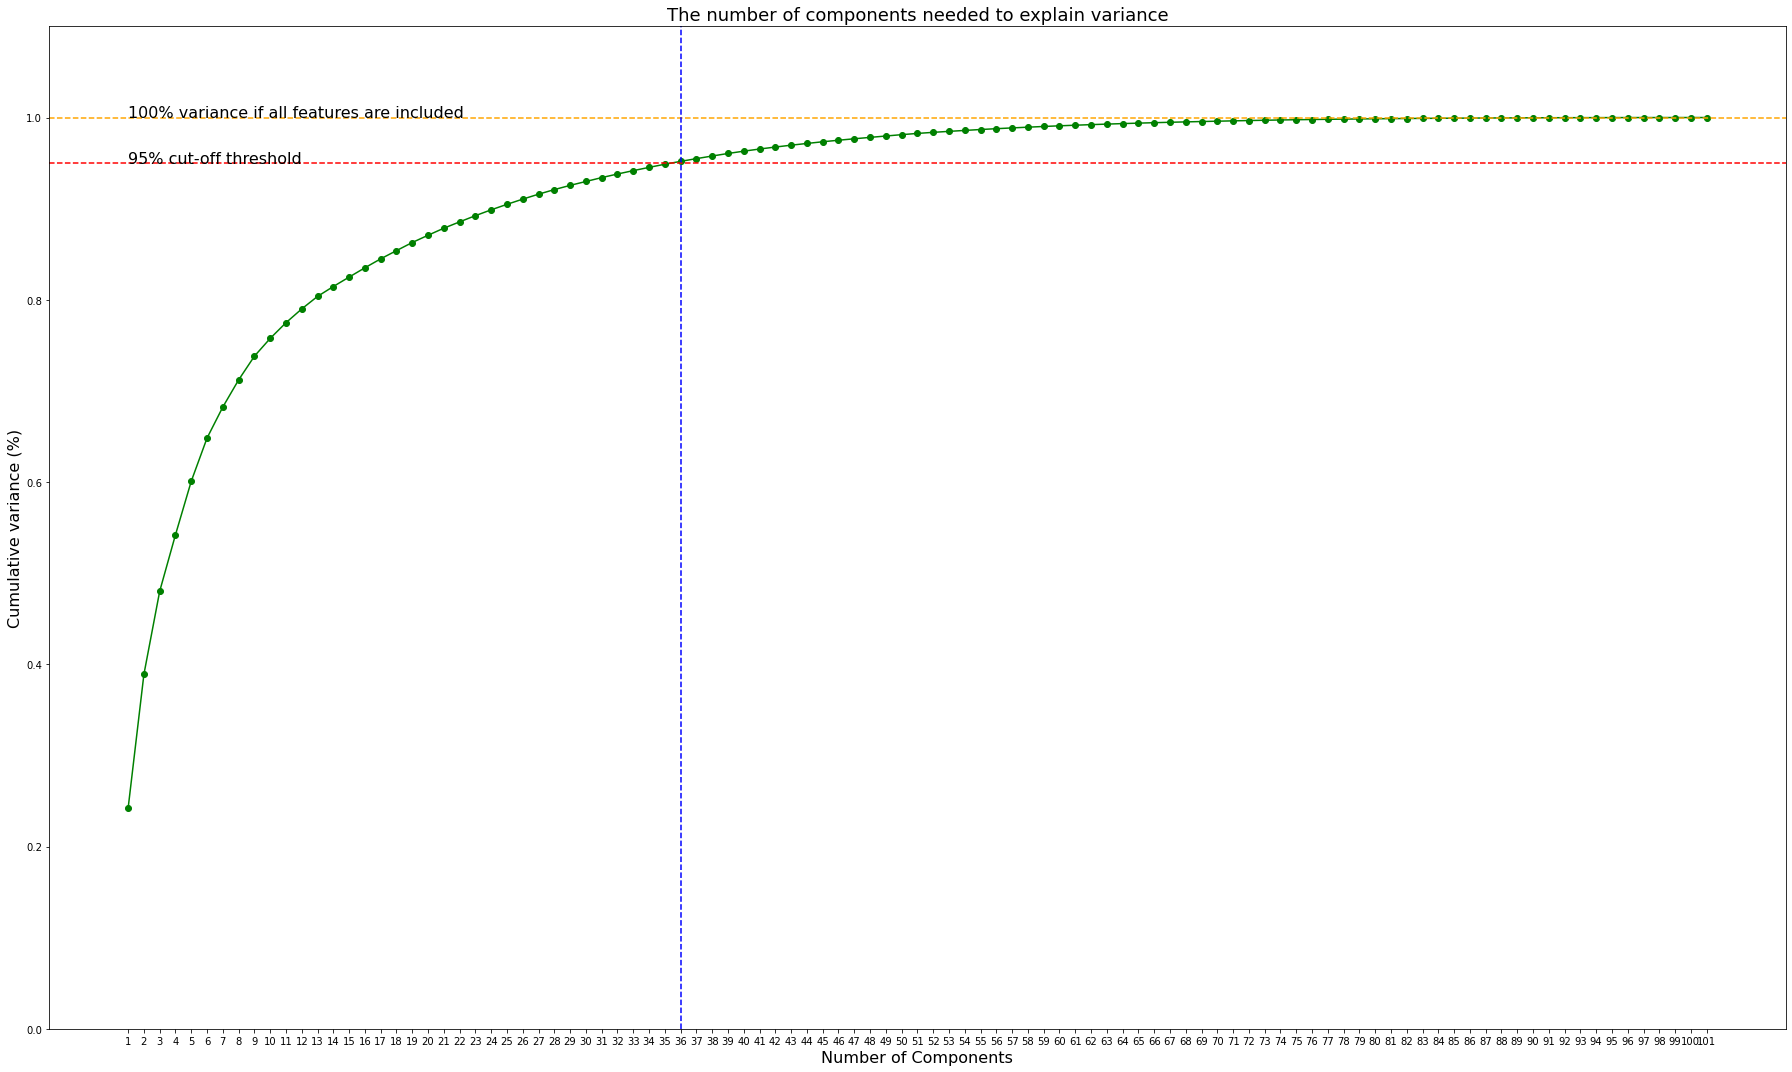

In [91]:
# finding cumulative variance captured by principal components
y_var = np.cumsum(explained_variance)

plt.figure(figsize=(25,15))
plt.ylim(0.0,1.1)
plt.plot(components, y_var, marker='o', linestyle='-', color='green')

plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Cumulative variance (%)',fontsize=16)
plt.title('The number of components needed to explain variance',fontsize=18)
plt.xticks(components) 

plt.axhline(y=0.95, color='red', linestyle='--')
plt.axhline(y=1.00, color='orange', linestyle='--')
plt.axvline(x=36.00, color='blue', linestyle='--')
plt.text(1, 0.95, '95% cut-off threshold', color = 'black', fontsize=16)
plt.text(1, 1, '100% variance if all features are included', color = 'black', fontsize=16)

plt.tight_layout()
plt.show()

In [92]:
# therefore for capturing 95% of variance in dataset we should take first 30 principal components
# adding the output or target attribute to train_set
train_set_pca.index = train_set.index
train_set_pca["ViolentCrimesPerPop"] = train_set["ViolentCrimesPerPop"]
train_set_pca
train_set = train_set_pca
train_set.shape

(1046, 37)

In [93]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,ViolentCrimesPerPop
22,-2.360998,1.846873,4.125858,0.507645,-2.278640,-0.518220,0.150925,0.144950,4.508038,-0.180128,...,0.002207,1.322325,-0.771820,0.732466,0.289585,-0.464614,-0.031889,0.489157,-0.563277,1.0
27,-1.447141,7.959853,0.922674,-0.871256,0.030290,-1.429054,-2.064173,1.794100,0.417099,-0.471323,...,1.243561,0.517630,-0.218174,0.810080,-0.490150,0.672405,-0.692222,0.462897,0.688056,2.0
28,1.492029,2.875179,2.259540,-3.062838,2.815922,-1.848797,0.599792,-0.504557,2.327421,-1.287618,...,-0.570210,0.976081,0.280318,-0.089937,0.249401,-0.884998,-0.451410,0.098134,-0.478119,1.0
34,-7.443684,4.671614,-3.591262,3.252589,0.760099,1.552172,0.823751,-1.897255,-0.442370,-0.440361,...,1.407829,1.100707,-0.043057,-1.250180,0.827358,0.006111,0.450254,-1.013972,-0.669085,1.0
38,1.447987,1.602728,-0.167608,0.227237,-1.506626,0.242809,2.333397,1.516306,-2.993963,2.054115,...,-0.203612,-0.258402,0.363693,-0.424435,0.498379,0.221481,0.475149,-0.277897,-0.751703,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,5.172223,-1.497303,4.050828,-0.934905,2.305401,-0.274013,-0.246995,-2.572875,-0.423348,0.429773,...,-0.702673,0.388850,-0.371466,-0.354183,-0.896847,0.127361,0.951924,0.620853,-0.045800,4.0
4275,3.909755,-2.546775,4.609521,-2.184349,1.296757,-1.159601,-0.181275,-2.531743,-0.744737,-0.071476,...,0.195026,0.367630,-0.419564,0.028451,0.153631,-0.243060,-0.246992,-0.266218,0.567654,4.0
4279,1.732450,-10.730062,2.054287,-4.327002,5.929301,0.688839,-1.070643,0.517650,-1.646726,-0.283205,...,0.696322,0.262708,-0.214811,0.687144,-0.733667,-0.475737,0.388969,-0.421262,0.572679,4.0
4282,2.798917,1.118305,-1.722834,-1.539517,-3.226729,2.049230,-1.029076,-0.025014,-2.961331,-1.155015,...,-0.805535,-0.556963,-0.012744,-0.424750,0.846999,0.650244,0.394127,-0.891372,0.339737,4.0


## ```Correlation Matrix for Train Dataset```

- We can see that we have transformed our train dataset into unrelated components by using PCA, as correlation between new features is almost 0

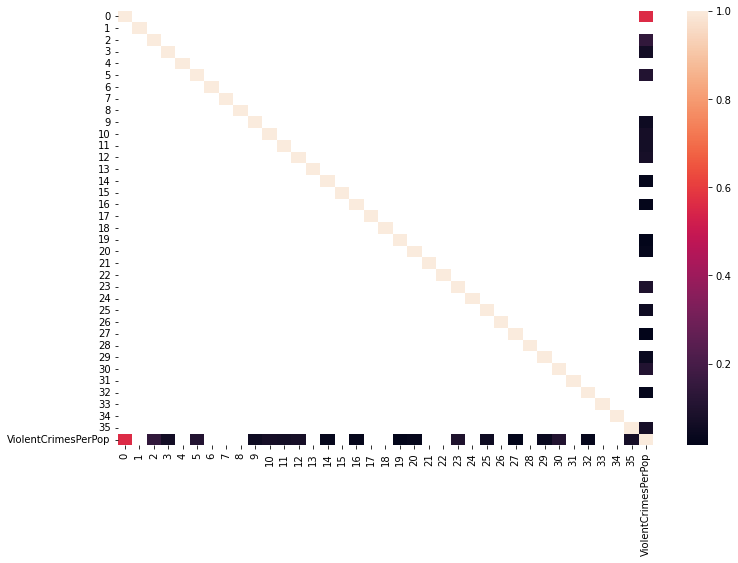

In [94]:
corr = train_set.corr()
plt.subplots(figsize=(12,8))
corr_new = corr[corr>=0.00001]
sns.heatmap(corr_new)
plt.show()

# ```Modifying Test Data```

In [95]:
# original test dataset
test_set

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,21,4,0.01,0.37,0.01,0.99,0.02,0.00,0.32,0.38,...,0.02,0.65,0.72,0.77,0.72,0.01,0.24,0.28,0.00,1.0
1,34,6,0.07,0.58,0.22,0.59,0.05,0.44,0.44,0.49,...,0.17,0.58,0.69,0.77,0.78,0.20,0.07,0.10,0.77,2.0
2,34,1,0.01,0.14,0.21,0.67,0.61,0.07,0.18,0.69,...,0.45,0.35,0.04,0.00,0.01,0.03,0.10,0.53,0.00,1.0
3,29,1,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,1.0
4,6,9,0.04,1.00,0.07,0.45,0.48,1.00,0.62,0.70,...,1.00,0.46,0.58,0.83,0.71,0.01,0.89,0.29,0.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,23,9,0.00,1.00,0.01,0.95,0.11,0.02,1.00,1.00,...,0.14,0.48,0.07,0.00,0.21,0.05,0.05,0.06,0.00,1.0
394,55,8,0.00,0.27,0.00,1.00,0.02,0.00,0.34,0.40,...,0.04,0.80,0.61,0.76,0.79,0.01,0.21,0.00,0.00,1.0
395,8,1,0.34,0.35,0.22,0.73,0.23,0.12,0.37,0.52,...,0.16,0.29,0.34,0.30,0.38,0.39,0.14,0.23,0.61,3.0
396,48,3,0.00,0.62,0.30,0.42,0.02,0.72,0.52,0.53,...,0.33,0.69,0.46,0.79,0.85,0.03,0.08,0.01,0.00,1.0


## ```Transforming test data into same feature space as train data```

In [96]:
# removing features, which were eliminated after ANOVA test
print(features_after_f_test)

Index(['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'PctTeen2Par', 'racePctWhite',
       'PctYoungKids2Par', 'racepctblack', 'pctWInvInc', 'FemalePctDiv',
       'TotalPctDiv',
       ...
       'agePct65up', 'PersPerOwnOccHous', 'MedOwnCostPctInc', 'PctEmplManu',
       'PctSameState85', 'PctWorkMomYoungKids', 'householdsize',
       'racePctAsian', 'PersPerOccupHous', 'ViolentCrimesPerPop'],
      dtype='object', length=102)


In [97]:
# remove features other than those left after ANOVA test
test_set_new = pd.DataFrame()
for feature in features_after_f_test:
    test_set_new[feature] = test_set[feature]
test_set = test_set_new
test_set

/var/folders/69/1b088435637d6qzmvv7zpycm0000gn/T/ipykernel_29795/1667621105.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set_new[feature] = test_set[feature]


,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
0,0.86,0.04,0.83,0.84,0.99,0.89,0.01,0.77,0.29,0.30,...,0.57,0.51,0.18,0.34,0.72,0.64,0.37,0.02,0.39,1.0
1,0.44,0.50,0.48,0.46,0.59,0.51,0.22,0.35,0.51,0.53,...,0.46,0.58,0.47,0.49,0.78,0.59,0.58,0.05,0.58,2.0
2,0.81,0.22,0.75,0.69,0.67,0.82,0.21,0.66,0.45,0.50,...,0.04,0.38,0.73,0.47,0.01,0.34,0.14,0.61,0.16,1.0
3,0.73,0.07,0.65,0.67,0.87,0.78,0.06,0.86,0.39,0.36,...,0.39,0.34,0.27,0.20,0.09,0.72,0.40,0.30,0.15,1.0
4,0.44,0.43,0.58,0.60,0.45,0.68,0.07,0.13,0.50,0.46,...,0.17,1.00,0.64,0.66,0.71,0.25,1.00,0.48,1.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.60,0.34,0.57,0.63,0.95,0.71,0.01,0.65,0.15,0.11,...,0.17,0.47,0.35,0.10,0.21,0.69,1.00,0.11,0.40,1.0
394,0.72,0.09,0.64,0.65,1.00,0.70,0.00,0.65,0.47,0.52,...,0.58,0.37,0.49,0.59,0.79,0.89,0.27,0.02,0.29,1.0
395,0.61,0.25,0.56,0.55,0.73,0.64,0.22,0.48,0.76,0.76,...,0.19,0.45,0.54,0.19,0.38,0.67,0.35,0.23,0.38,3.0
396,0.56,0.28,0.60,0.59,0.42,0.65,0.30,0.25,0.57,0.63,...,0.28,0.66,0.27,0.58,0.85,0.06,0.62,0.02,0.68,1.0


# ```Feature Scaling for Test Data```

## ```Plot showing distribution of features before standardization```

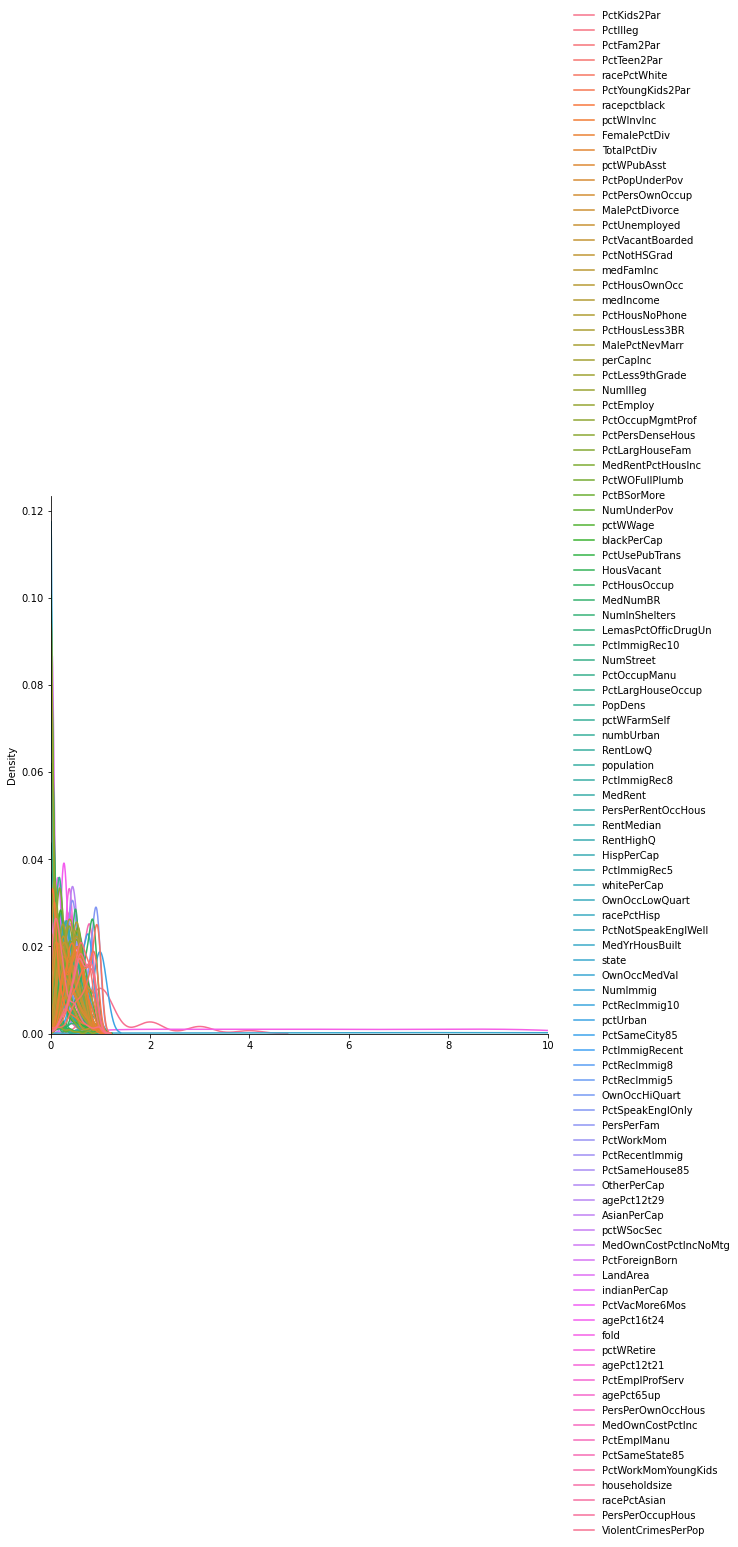

In [98]:
x_axis_limits = (0,10)
sns.displot(test_set.select_dtypes(include='number'), kind='kde',aspect=1,height=8,warn_singular=False,facet_kws={'xlim': x_axis_limits})
plt.show()

# ```Standardizing the test dataset```

- We are standardizing test data set with mean and standard deviation values obtained from trained dataset

In [99]:
# standardizing the test dataset
test_set_new = test_set.select_dtypes(include='number')
test_set_new = test_set_new.drop(columns = ['ViolentCrimesPerPop'])
test_set_new, mean_calculated, standard_deviation_calculated = standardize_dataset(test_set_new,mean_calculated,standard_deviation_calculated)
test_set_new

/var/folders/69/1b088435637d6qzmvv7zpycm0000gn/T/ipykernel_29795/2610170990.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  standardized_df[dataset.columns[ind]] = standardized_result


,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,PctEmplProfServ,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous
0,2.417657,-1.651974,2.345151,2.370573,1.562672,2.150943,-1.265819,4.031402,-3.035666,-2.956433,...,1.335359,0.698395,0.836170,-1.378360,-0.501378,0.305164,0.791935,-0.461671,-0.746843,-0.226813
1,-0.027295,0.426013,0.213433,0.161692,-0.224628,0.179670,-0.530179,-0.283435,-0.956248,-0.920477,...,0.141044,-0.159426,1.508325,0.567622,0.333621,0.725183,0.425760,1.863684,-0.303453,1.670052
2,2.126591,-0.838848,1.857901,1.498646,0.132832,1.787814,-0.565209,2.901326,-1.523362,-1.186036,...,0.784137,-3.434744,-0.412119,2.312296,0.222288,-4.665060,-1.405119,-3.008489,7.973155,-2.523017
3,1.660886,-1.516453,1.248839,1.382389,1.026482,1.580311,-1.090667,4.956010,-2.090476,-2.425314,...,5.377659,-0.705313,-0.796207,-0.774435,-1.280711,-4.105035,1.377817,-0.129478,3.391461,-2.622852
4,-0.027295,0.109798,0.822495,0.975490,-0.850182,1.061555,-1.055636,-2.543588,-1.050767,-1.540115,...,-1.971976,-2.420955,5.541257,1.708371,1.279954,0.235161,-2.064236,6.514396,6.051800,5.863121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.904115,-0.296765,0.761589,1.149875,1.383942,1.217182,-1.265819,2.798591,-4.358933,-4.638310,...,5.377659,-2.420955,0.452081,-0.237612,-1.837378,-3.264997,1.158111,6.514396,0.583326,-0.126978
394,1.602673,-1.426106,1.187933,1.266132,1.607354,1.165306,-1.300850,2.798591,-1.334324,-1.008996,...,0.416655,0.776379,-0.508141,0.701828,0.890288,0.795186,2.622814,-1.568984,-0.746843,-1.225162
395,0.962328,-0.703328,0.700683,0.684848,0.400927,0.854053,-0.530179,1.052110,1.406727,1.115480,...,-0.685790,-2.264988,0.260037,1.037342,-1.336378,-2.074943,1.011641,-0.683134,2.356885,-0.326648
396,0.671263,-0.567807,0.944308,0.917361,-0.984230,0.905928,-0.249934,-1.310777,-0.389134,-0.035278,...,-2.339458,-1.563134,2.276502,-0.774435,0.834621,1.215205,-3.455704,2.306609,-0.746843,2.668402


In [100]:
# checking mean and variance of each feature after standardizing the test dataset
# here mean of all features might not be 0 because we have standardized using mean of train dataset
for feature in test_set_new:
    print("Mean of",feature,"is",round(find_mean(test_set_new,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(test_set_new,feature)))

Mean of PctKids2Par is 1
Standard Deviation of PctKids2Par is 1
Mean of PctIlleg is -1
Standard Deviation of PctIlleg is 1
Mean of PctFam2Par is 1
Standard Deviation of PctFam2Par is 1
Mean of PctTeen2Par is 1
Standard Deviation of PctTeen2Par is 1
Mean of racePctWhite is 1
Standard Deviation of racePctWhite is 1
Mean of PctYoungKids2Par is 1
Standard Deviation of PctYoungKids2Par is 1
Mean of racepctblack is -1
Standard Deviation of racepctblack is 1
Mean of pctWInvInc is 1
Standard Deviation of pctWInvInc is 2
Mean of FemalePctDiv is -1
Standard Deviation of FemalePctDiv is 2
Mean of TotalPctDiv is -1
Standard Deviation of TotalPctDiv is 2
Mean of pctWPubAsst is -1
Standard Deviation of pctWPubAsst is 1
Mean of PctPopUnderPov is -1
Standard Deviation of PctPopUnderPov is 1
Mean of PctPersOwnOccup is 1
Standard Deviation of PctPersOwnOccup is 2
Mean of MalePctDivorce is -1
Standard Deviation of MalePctDivorce is 2
Mean of PctUnemployed is -1
Standard Deviation of PctUnemployed is 1
Me

## ```Plot showing distribution of features after standardization```

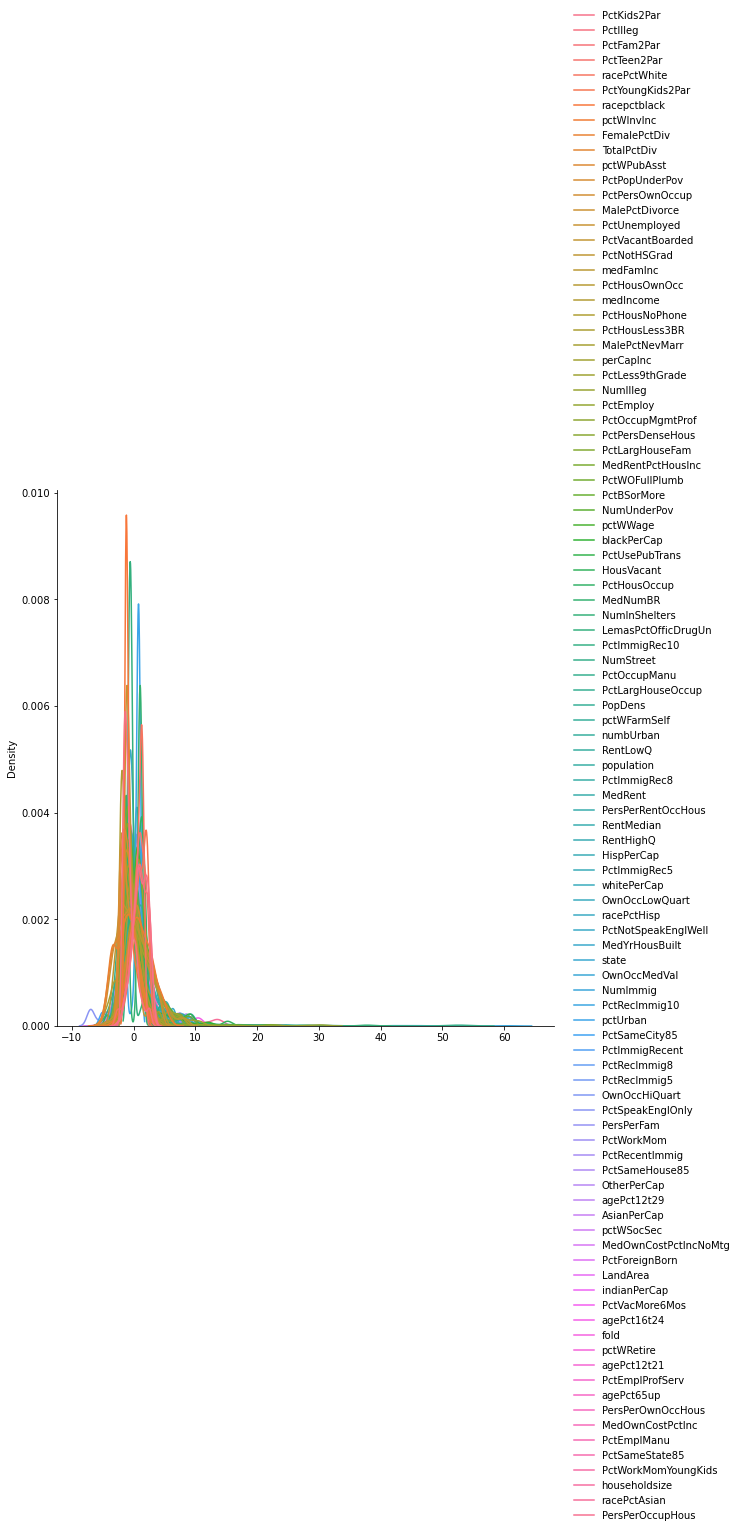

In [101]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(test_set_new, kind='kde',aspect=1,height=8)
plt.show()

In [102]:
# replacing standardized features with original features in test_set dataframe
test_set_new.index = test_set.index
test_set_new["ViolentCrimesPerPop"] = test_set["ViolentCrimesPerPop"]
test_set = test_set_new
test_set

,PctKids2Par,PctIlleg,PctFam2Par,PctTeen2Par,racePctWhite,PctYoungKids2Par,racepctblack,pctWInvInc,FemalePctDiv,TotalPctDiv,...,agePct65up,PersPerOwnOccHous,MedOwnCostPctInc,PctEmplManu,PctSameState85,PctWorkMomYoungKids,householdsize,racePctAsian,PersPerOccupHous,ViolentCrimesPerPop
0,2.417657,-1.651974,2.345151,2.370573,1.562672,2.150943,-1.265819,4.031402,-3.035666,-2.956433,...,0.698395,0.836170,-1.378360,-0.501378,0.305164,0.791935,-0.461671,-0.746843,-0.226813,1.0
1,-0.027295,0.426013,0.213433,0.161692,-0.224628,0.179670,-0.530179,-0.283435,-0.956248,-0.920477,...,-0.159426,1.508325,0.567622,0.333621,0.725183,0.425760,1.863684,-0.303453,1.670052,2.0
2,2.126591,-0.838848,1.857901,1.498646,0.132832,1.787814,-0.565209,2.901326,-1.523362,-1.186036,...,-3.434744,-0.412119,2.312296,0.222288,-4.665060,-1.405119,-3.008489,7.973155,-2.523017,1.0
3,1.660886,-1.516453,1.248839,1.382389,1.026482,1.580311,-1.090667,4.956010,-2.090476,-2.425314,...,-0.705313,-0.796207,-0.774435,-1.280711,-4.105035,1.377817,-0.129478,3.391461,-2.622852,1.0
4,-0.027295,0.109798,0.822495,0.975490,-0.850182,1.061555,-1.055636,-2.543588,-1.050767,-1.540115,...,-2.420955,5.541257,1.708371,1.279954,0.235161,-2.064236,6.514396,6.051800,5.863121,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.904115,-0.296765,0.761589,1.149875,1.383942,1.217182,-1.265819,2.798591,-4.358933,-4.638310,...,-2.420955,0.452081,-0.237612,-1.837378,-3.264997,1.158111,6.514396,0.583326,-0.126978,1.0
394,1.602673,-1.426106,1.187933,1.266132,1.607354,1.165306,-1.300850,2.798591,-1.334324,-1.008996,...,0.776379,-0.508141,0.701828,0.890288,0.795186,2.622814,-1.568984,-0.746843,-1.225162,1.0
395,0.962328,-0.703328,0.700683,0.684848,0.400927,0.854053,-0.530179,1.052110,1.406727,1.115480,...,-2.264988,0.260037,1.037342,-1.336378,-2.074943,1.011641,-0.683134,2.356885,-0.326648,3.0
396,0.671263,-0.567807,0.944308,0.917361,-0.984230,0.905928,-0.249934,-1.310777,-0.389134,-0.035278,...,-1.563134,2.276502,-0.774435,0.834621,1.215205,-3.455704,2.306609,-0.746843,2.668402,1.0


# ```PCA for test data```

In [103]:
# taking projection of test data on principal component vectors,
# to get same number of features in test data as of train data
test_set_pca = np.dot(test_set.drop(columns="ViolentCrimesPerPop"),k_principal_components.T)
test_set_pca = pd.DataFrame(test_set_pca)
test_set_pca.index = test_set.index
test_set_pca["ViolentCrimesPerPop"] = test_set["ViolentCrimesPerPop"]
test_set_pca

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,ViolentCrimesPerPop
0,-8.381388,8.886566,1.532797,3.218392,0.246438,0.007568,-3.682067,-0.945343,-0.135820,-2.709594,...,-0.158089,-0.502377,-1.729530,-1.173375,-0.637656,1.958267,-0.859359,-0.390942,-0.201294,1.0
1,-2.147304,-1.790273,-4.256463,4.707015,0.457863,-0.279839,-1.522824,0.643523,-2.600230,3.201084,...,-0.402704,1.536636,-0.691455,0.445162,2.128725,-0.993038,1.269202,-1.748399,-0.027584,2.0
2,-21.475811,-6.583620,11.670088,-4.362050,-5.688029,6.248615,-1.821663,0.248500,3.315016,-0.055065,...,-0.631693,1.805595,2.400072,-3.603412,-3.057228,0.712781,-1.400477,-0.712166,1.288967,1.0
3,-16.186497,0.158672,10.238806,1.292196,-11.684169,6.742646,-7.338530,1.618154,9.628336,0.951799,...,-4.066264,-1.855311,3.684240,0.668932,-0.725681,3.803676,2.947327,1.171965,-4.029495,1.0
4,-10.602371,-22.642634,-16.262279,0.846165,8.219615,4.450340,0.015121,8.120063,-0.111820,-0.543618,...,-1.828207,-1.787983,0.525416,-1.937036,0.434142,1.812694,-0.424744,0.881783,-0.122062,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-6.482000,-3.185092,0.137684,-3.111196,-13.191133,1.755999,-6.111537,4.253755,13.981021,0.586823,...,-2.203526,-1.174230,1.288810,1.105993,0.099666,-0.046508,-0.321734,-1.976266,0.406831,1.0
394,-2.603001,9.247413,1.229680,-0.965769,1.719885,-0.435603,-1.019826,1.447811,-0.658373,0.299788,...,1.165058,0.018667,0.535274,-0.205283,-1.164539,1.185631,0.496250,0.581898,0.095020,1.0
395,-7.409865,-4.747490,5.619794,4.717426,-7.346563,-9.696860,2.812491,-0.659459,-4.551440,2.447969,...,1.182139,-0.202892,0.179762,-0.407828,-1.938187,2.042707,-0.884550,0.779421,-1.252136,3.0
396,2.890404,-6.157752,-10.676276,-2.387439,4.066325,-1.740989,0.570418,2.333606,0.304682,0.734020,...,-2.451969,-0.382821,-2.518744,-0.892718,0.322410,0.992856,0.453908,-1.193658,0.301124,1.0


In [104]:
# finally we have test_set in same dimension as our train_set
test_set = test_set_pca
test_set.shape

(398, 37)

# ```Implementing Machine Learning Models```

- Decision tree model with entropy implementation
- Adaboost
- Multiclass SVM

## ```Classification Report```

- True Positive (TP): Predictions which are predicted by classifier as ```positive``` and are actually ```positive```


- False Positive (FP): Predictions which are predicted by classifier as ```positive``` and are actually ```negative```


- True Negative (TN): Predictions which are predicted by classifier as ```negative``` and are actually ```negative```


- False Negative (FN): Predictions which are predicted by classifier as ```negative``` and are actually ```positive```




- ```Accuracy```

    It describes the number of correct predictions over all predictions.
      
$$
\frac{TP+TN}{TP+FP+TN+FN} = \frac{\text{Number of correct  predictions}}{\text{Number of total predictions}}
$$
    
- ```Precision```

    Precision is a measure of how many of the positive predictions made are correct.
    
$$
\frac{TP}{TP+FP} = \frac{\text{Number of correctly predicted positive instances}}{\text{Number of total positive predictions made}}
$$

- ```Recall```

    Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.
    
$$
\frac{TP}{TP+FN} = \frac{\text{Number of correctly predicted positive instances}}{\text{Number of total positive instances in dataset}}
$$

- ```F1 Score```

    F1-Score is a measure combining both precision and recall. It is harmonic mean of both.

$$
\frac{2*{\text{Precision}}*{\text{Recall}}}{\text{Precision}+\text{Recall}}
$$

- ```Support```

    Support may be defined as the number of samples of the true response that lies in each class of target values  
$$
$$
- ```Confusion Matrix```
    
    It is a table with 4 different combinations of predicted and actual values.
    
    
    

                        |                 | Predicted Positive | Predicted Negative  |
                        |-----------------|--------------------|---------------------|
                        | Actual Positive | True Positives     | False Negatives     |
                        | Actual Negative | False Positives    | True Negatives      |

- ```ROC Curve```

    The ROC curve is produced by calculating and plotting the true positive rate against the false positive rate  for a single classifier at a variety of thresholds.
    
    The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.

$$
    \text{True Positive Rate (TPR) }  =  \frac{TP}{TP+FN}
$$

$$
    \text{False Positive Rate (FPR) }  =  \frac{FP}{FP+TN}
$$

$$
$$

In [105]:
# Machine Learning Algorithms
MLA = {} # dictionary for comparing models
MLA_predictions = {} # dictionary for comparing ROC curve of models

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

# function to show performance metrics for classification models
def performance_metrics(name,y_test,y_pred):
    # finding accuracy score
    accuracy = accuracy_score(y_test, y_pred)
   
    # calculating classification report
    clf_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
   
    # confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt='',cmap = 'YlGnBu')
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
   
    MLA[name] = [name,accuracy_score(y_test, y_pred)*100,precision_score(y_test,y_pred,average='weighted'),recall_score(y_test,y_pred,average='weighted')]
    MLA_predictions[name] = y_pred

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
   
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = y_test_bin.shape[1]
   
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
   
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
   
    # Plot ROC curves
    plt.figure(figsize=(8, 6))
   
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i + 1, roc_auc[i]))
   
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Classes')
    plt.legend(loc="lower right")
    plt.show()

## ```Splitting train and test data into x and y components```

In [107]:
x_train = train_set.drop(columns='ViolentCrimesPerPop')
y_train = train_set['ViolentCrimesPerPop']
x_test = test_set.drop(columns='ViolentCrimesPerPop')
y_test = test_set['ViolentCrimesPerPop']

In [108]:
# converting column names in train and test dataset to strings

In [109]:
new_column_names = []
for val in train_set.columns:
    new_column_names.append(str(val))
train_set.columns = new_column_names
test_set.columns = new_column_names

# ```2. Decision tree model with entropy implementation```

- Decision Tree is a Supervised learning technique that can be used for classification problems.


- A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.


- Decision trees can model nonlinear relationships in the data, capturing complex patterns that linear models may miss.


- Decision trees are relatively robust to irrelevant features, as they are less likely to be selected for splitting.


- Decision trees are prone to overfitting, especially when the tree is deep. Overfitting occurs when the model captures noise in the training data, leading to poor generalization on new, unseen data.

## ```2.1 Implementation of the Model```

In [110]:
# creating validation data set, which will be used in pruning of decision tree
train_set_new, val_set = split_train_test(train_set,0.2)

In [111]:
train_set_new.shape

(837, 37)

In [112]:
val_set.shape

(209, 37)

In [113]:
x_train_new = train_set_new.drop(columns='ViolentCrimesPerPop')
y_train_new = train_set_new['ViolentCrimesPerPop']

## ```Helper functions for Decision Tree```

In [114]:
import random
from pprint import pprint

In [115]:
# function to check if y_values are pure i.e all belong to a single class or not
def check_purity(y_values):
    y_values = np.array(y_values)
    unique_classes = np.unique(y_values)
    if(len(unique_classes) == 1):
        return True
    return False

In [116]:
# function to classify data based on majority count in y_values
def classify_data(y_values):
    y_values = np.array(y_values)
    unique_classes, counts_unique_classes = np.unique(y_values, return_counts = True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

In [117]:
# function to find all possible potential splits for all features
def get_potential_splits(x_train,random_subspace=None):
    # random_subspace is number of features that we will randomly select from all features
    potential_splits = {} # dictionary that will contain splits for each feature
    num_columns = x_train.shape[1]
    
    # for creating a list from 0 to num_columns
    column_indices = list(range(num_columns))
    
    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(column_indices,random_subspace)
    
    # for each feature we will have multiple splits
    for column_index in column_indices:
        potential_splits[column_index] = []
        values = x_train.iloc[:,column_index]
        unique_values = np.unique(values)
        potential_splits[column_index] = unique_values

    return potential_splits

In [118]:
# split data function
def split_data(train_dataset,split_column,split_value):
    # this will take all values for that particular column
    split_column_values = train_dataset.iloc[:,split_column]
    
    # splitting data into binary split
    left_child_data = train_dataset[split_column_values <= split_value]
    right_child_data = train_dataset[split_column_values > split_value]

    return left_child_data, right_child_data

### ```Entropy```

Entropy is a measurement of uncertainty (sometimes called impurity) has the following formula

$$
H(X) = - \sum_{j} p_{j} log_{2}(p_{j})
$$

\begin{equation}
\text{where} \space {p_{j} \space \text{is the probability of class j}}
\end{equation}

For two class problem, it takes the following form

$$
H(X) = - plog_{2}(p)  -(1-p)log_{2}(1-p)
$$


When we are looking for a value to split our decision tree node, we want to minimize entropy.

In [119]:
# entropy function, to find impurity measure for parent node
def calculate_entropy(train_dataset):
    # to find number of samples belonging to class 1 and class 2
    y_train = np.array(train_dataset.iloc[:,-1])
    _, counts = np.unique(y_train,return_counts=True)
    total_samples = counts.sum()
    
    # this will contain p_j i.e probability of class j, where j=1,2
    probability_of_class = counts / total_samples
    entropy = -sum((probability_of_class * np.log2(probability_of_class)))
    
    return entropy

### ```Overall Entropy```

Overall Entropy for children nodes, can be calculated using the formula

$$
H(children) = \sum_{j}^{2}( \frac{n_{j}}{N} \cdot H_{j})
$$

$$
  \text{where} \space n_{j} \space \text{is number of training samples associated with node j such that}
$$

$$
N = \sum_{j}^{2} n_{j}
$$

$$
  \text{and} \space H_{j} \space\text{is entropy of child node j}
$$

In [120]:
# overall entropy function
def calculate_overall_entropy(left_child_data,right_child_data):
    n1 = len(left_child_data) # number of data points belonging to left child
    n2 = len(right_child_data) # number of data points belonging to right child
    N = n1 + n2 # total number of data points
    overall_entropy = ((n1/N)*calculate_entropy(left_child_data)) + ((n2/N)*calculate_entropy(right_child_data))
    return overall_entropy

### ```Information Gain```

Information gain is a measure which tells how much information we have gained after splitting a node at a particular value.

$$
   \text{Information Gain} = H(Parent) - H(Children)
$$

$$
\text{where} \space H(Parent) \space\text{is entropy of Parent node or entropy before split and} \space H(Children) \space\text{is overall entropy of both left and right child nodes or entropy after split.}
$$

We need to find the split, which results in highest information gain.

In [121]:
# function for finding information gain
def calculate_information_gain(train_dataset,left_child_data,right_child_data):
    return calculate_entropy(train_dataset) - calculate_overall_entropy(left_child_data,right_child_data)

In [122]:
# function for finding best split, by taking highest information gain
def find_best_split(train_dataset):
    information_gain = -1e9
    
    if(len(train_dataset.columns) == 31):
        x_train = train_dataset.drop(columns="ViolentCrimesPerPop")
    else:
        x_train = train_dataset
        
    # find all possible splits
    potential_splits = get_potential_splits(x_train)

    # iterating over all splits to find best split, which gives minimum overall entropy
    for column_index in potential_splits:
        for value in potential_splits[column_index]:

            # this will give data points for left and right child
            left_child_data, right_child_data = split_data(x_train,column_index,value)
            information_gain_current = calculate_information_gain(train_dataset,left_child_data,right_child_data)

            if information_gain_current > information_gain:
                information_gain = information_gain_current
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# ```Decision Tree Algorithm```

- We will represent our decision tree in form of a dictionary {}, where {key:[yes,no]} represents a node, in which key will be a question and yes corresponds to left child node and no corresponds to right child node

- Also yes and no can contain dictionaries, which will represent the left and right subtrees

### ```Pre Pruning of Decision Tree```

Pre pruning is nothing but stopping the growth of decision tree on an early stage before it perfectly fits the entire training data. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth, min_samples etc.

In [123]:
def decision_tree_algorithm(train_dataset,counter=0,min_samples=2,max_depth=5,random_subspace=None):
    
    # converting train_dataset to numpy 2d array
    if counter == 0:
        global column_headers
        column_headers = train_dataset.columns
        # first call of this function, so convert train_dataset to numpy 2d array
        data = train_dataset.values
    else:
        data = train_dataset
    
    x_train = train_dataset.drop(columns="ViolentCrimesPerPop")
    y_train = train_dataset.iloc[:,-1]
    
    # base case, if node is pure, or contains less than min_samples or depth of tree has reached max_depth so stop
    if (check_purity(y_train)) or (len(train_dataset) < min_samples) or (counter == max_depth):
        classification = classify_data(y_train)
        return classification
    
    else:
        # recursive part of decision tree algorithm
        counter += 1 # increment the depth of decision tree

        # helper functions
        potential_splits = get_potential_splits(x_train,random_subspace)
        split_column, split_value = find_best_split(x_train)
        left_child_data, right_child_data = split_data(train_dataset,split_column,split_value)
        
        if len(left_child_data) == 0 or len(right_child_data) == 0:
            classification = classify_data(y_train)
            return classification
        
        # instantiate sub tree
        feature_name = column_headers[split_column]
        question = "{} <= {}".format(feature_name,split_value)
        sub_tree = {question : []}
        
        # find answers
        yes_answer = decision_tree_algorithm(left_child_data,counter,min_samples,max_depth,random_subspace)
        no_answer = decision_tree_algorithm(right_child_data,counter,min_samples,max_depth,random_subspace)
        
        # if both answers are same then, assign sub_tree as yes_answer instead of left and right child
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [124]:
tree = decision_tree_algorithm(train_set_new,counter=0,min_samples=2,max_depth=10)
tree

{'0 <= 0.7280063836287614': [{'0 <= -3.261947911874109': [{'0 <= -7.052976662483581': [{'0 <= -9.495292969870643': [{'0 <= -10.800313303159285': [{'0 <= -11.793150969937663': [{'0 <= -13.161891236352506': [1.0,
              {'0 <= -12.428216743809624': [{'0 <= -12.560854679077366': [1.0,
                  {'0 <= -12.521555953092221': [1.0, 2.0]}]},
                {'0 <= -12.201598728739986': [{'0 <= -12.342009027908947': [2.0,
                    1.0]},
                  {'0 <= -11.858100017615454': [2.0, 1.0]}]}]}]},
            {'0 <= -11.254842726339641': [{'0 <= -11.37628603637561': [{'0 <= -11.650739822378933': [1.0,
                  {'0 <= -11.553027433257745': [1.0, 2.0]}]},
                {'0 <= -11.331454171776372': [1.0, 2.0]}]},
              {'0 <= -11.027055309898248': [{'0 <= -11.252506745086137': [1.0,
                  2.0]},
                {'0 <= -10.912270523114513': [2.0,
                  {'0 <= -10.864369423492938': [1.0, 2.0]}]}]}]}]},
          {'0 <= -10.27

In [125]:
# classify example
def classify_example(example,tree):
    question = list(tree.keys())[0]
    feature_name, comparision_operator, value = question.split()
    
    # ask a question
    if example[int(feature_name)] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
        
    # base case, answer is a leaf node
    if not isinstance(answer,dict):
        return answer
    else:
        # recursive part
        residual_tree = answer
        return classify_example(example,residual_tree)

In [126]:
def make_predictions(x_test,tree):
    # find predicted values for each test data point
    predicted_output = []
    for ind in range(len(x_test)):
        predicted_output.append(classify_example(x_test.iloc[ind],tree))
    
    return predicted_output

In [127]:
def calculate_accuracy(y_predicted,y_test):
    # finding accuracy
    correct_predictions = 0
    for ind in range(len(y_test)):
        if y_test.iloc[ind] == y_predicted[ind]:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(y_test)
    return accuracy

In [128]:
y_predicted = make_predictions(x_test,tree)
calculate_accuracy(y_predicted,y_test)*100

49.246231155778894

## ```Post Pruning in Decision Tree```

- This is done after construction of decision tree, pruning is done in a bottom-up fashion.


- It is done by replacing a subtree with a new leaf node with a class label which is majority class of records.


- We are using validation dataset for post pruning of decision tree

In [129]:
def filter_df(df,question):
    feature, _ , value = question.split()
    df_yes =  df[df[feature] <= float(value)]
    df_no =  df[df[feature] > float(value)]
    
    return df_yes, df_no

In [130]:
def pruning_result(tree,x_train,y_train,x_val,y_val):
    
    # setting leaf with value as majority label in train set
    leaf = y_train.value_counts().index[0]
    errors_leaf = sum(y_val != leaf)
    errors_decision_node = sum(y_val != make_predictions(x_val,tree))

    # returning leaf node or subtree whichever has less error
    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree

In [131]:
def post_pruning(tree,train_set,val_set):
    
    # find question for root node of tree
    question = list(tree.keys())[0]
    
    # this will give left and right subtrees
    yes_answer, no_answer = tree[question]
    
    x_train = train_set.drop(columns='ViolentCrimesPerPop')
    y_train = train_set['ViolentCrimesPerPop']
    x_val = val_set.drop(columns='ViolentCrimesPerPop')
    y_val = val_set['ViolentCrimesPerPop']

    # base case
    # both left and right subtrees are leaf nodes, so either it will return the same tree, or replace this tree with a leaf node
    if not isinstance(yes_answer,dict) and not isinstance(no_answer,dict):
        return pruning_result(tree,x_train,y_train,x_val,y_val)
        
    # recursive part
    else:
        df_train_yes, df_train_no = filter_df(train_set,question)
        df_val_yes, df_val_no = filter_df(val_set,question)
        
        # left subtree, this will do post pruning on left subtree recursively
        if isinstance(yes_answer,dict):
            yes_answer =  post_pruning(yes_answer,df_train_yes,df_val_yes)
            
        # right subtree, this will do post pruning on right subtree recursively
        if isinstance(no_answer,dict):
            no_answer = post_pruning(no_answer,df_train_no,df_val_no)
        
        # new tree, so that it doesn't replace the existing tree
        tree = {question:[yes_answer,no_answer]}
        
    # we are calling pruning_result here, because the tree after post_pruning can be replaced by a single leaf node
    return pruning_result(tree,x_train,y_train,x_val,y_val)

In [132]:
pruned_tree = post_pruning(tree,train_set_new,val_set)
pruned_tree

{'0 <= 0.7280063836287614': [{'0 <= -3.261947911874109': [{'0 <= -7.052976662483581': [1.0,
      {'0 <= -4.9306413441681824': [{'0 <= -6.044588889216328': [{'0 <= -6.602963967443026': [1.0,
            {'0 <= -6.301085287062221': [1.0,
              {'0 <= -6.131347709837168': [2.0, 1.0]}]}]},
          {'0 <= -5.400839178523503': [1.0,
            {'0 <= -5.254707533318251': [1.0,
              {'0 <= -5.161247732039175': [2.0,
                {'0 <= -5.091761781029507': [2.0, 1.0]}]}]}]}]},
        {'0 <= -4.293304018053063': [2.0, 1.0]}]}]},
    {'0 <= -0.9176182976712918': [{'0 <= -2.004983943070221': [{'0 <= -2.56560007790081': [{'0 <= -2.898180615338752': [1.0,
            2.0]},
          {'0 <= -2.2075426718777584': [1.0, 3.0]}]},
        {'0 <= -1.3696059927761268': [{'0 <= -1.5046429969184312': [3.0,
            {'0 <= -1.4158784305179881': [{'0 <= -1.4471406463612937': [2.0,
                3.0]},
              1.0]}]},
          3.0]}]},
      {'0 <= -0.10782598922476021':

## ```Visualizing Decision Boundaries after Post Pruning```

- We can see that unpruned tree has overfitting, it overfits the train dataset, but pruned tree prevents overfitting

In [133]:
def plot_decision_boundaries(tree, x_min, x_max, y_min, y_max):
    forest_green = (34/255, 139/255, 34/255)
    gold = (255/255,215/255,0/255)
    color_keys = {1:"blue",2:"orange",3:"green",4:"red"}
    
    # recursive part
    if isinstance(tree, dict):
        question = list(tree.keys())[0]
        yes_answer, no_answer = tree[question]
        feature, _, value = question.split()
    
        if feature == "0":
            plot_decision_boundaries(yes_answer, x_min, float(value), y_min, y_max)
            plot_decision_boundaries(no_answer, float(value), x_max, y_min, y_max)
        else:
            plot_decision_boundaries(yes_answer, x_min, x_max, y_min, float(value))
            plot_decision_boundaries(no_answer, x_min, x_max, float(value), y_max)
        
    # "tree" is a leaf
    else:
        plt.fill_between(x=[x_min, x_max], y1=y_min, y2=y_max, alpha=0.2, color=color_keys[tree])
        
    return

In [134]:
def create_plot(df,tree=None,title=None):
    sns.lmplot(data=df,x=df.columns[0], y=df.columns[1], hue="ViolentCrimesPerPop", fit_reg=False, height=4, aspect=1.5, legend=False)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(["low","medium","high","very high"])
    plt.title(title)
    
    if tree or tree == False: # root of the tree might just be a leave with "False"
        x_min, x_max = round(df["0"].min()), round(df["0"].max())
        y_min, y_max = round(df["1"].min()), round(df["1"].max())

        plot_decision_boundaries(tree, x_min, x_max, y_min, y_max)
    
    return

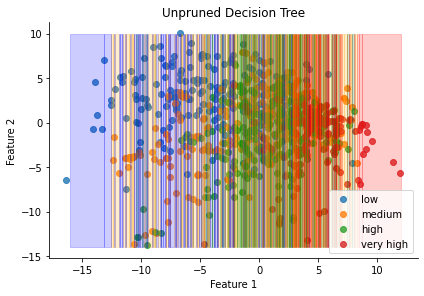

In [135]:
# plotting decision boundaries for train_set using unpruned tree
create_plot(train_set_new,tree,"Unpruned Decision Tree")

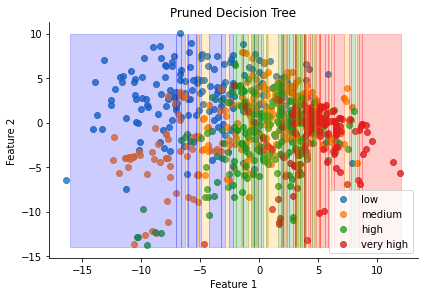

In [136]:
# plotting decision boundaries for train_set using pruned decision tree
create_plot(train_set_new,pruned_tree,"Pruned Decision Tree")

## ```Accuracy difference before and after pruning decision tree```

In [137]:
# before pruning decision tree
y_predicted = make_predictions(x_test,tree)
calculate_accuracy(y_predicted,y_test)*100

49.246231155778894

In [138]:
# after pruning decision tree
y_predicted = make_predictions(x_test,pruned_tree)
calculate_accuracy(y_predicted,y_test)*100

55.527638190954775

## ```2.2 Insights drawn (plots, markdown explanations)```

## ```Comparing Accuracy of Decision Tree for different depths```



Decision boundary on the training set before and after pruning




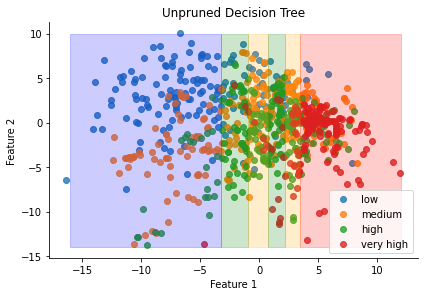

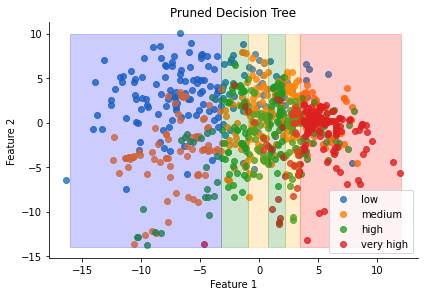

Accuracy for decision tree with max depth as 3 is 56.03015075376885


Decision boundary on the training set before and after pruning




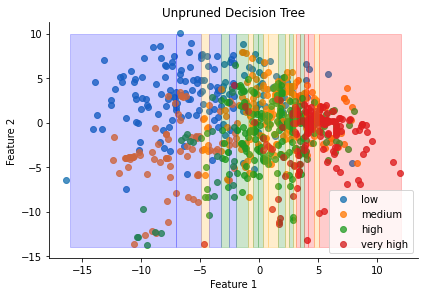

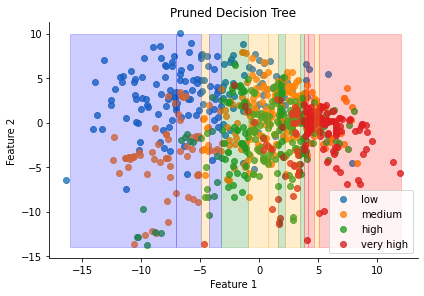

Accuracy for decision tree with max depth as 5 is 56.53266331658291


Decision boundary on the training set before and after pruning




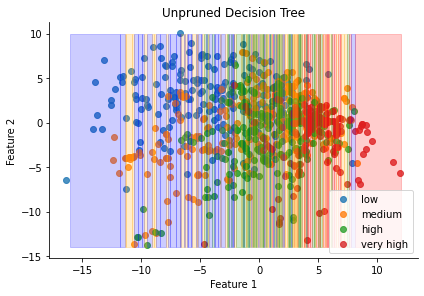

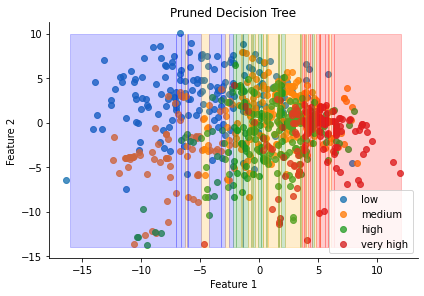

Accuracy for decision tree with max depth as 8 is 58.040201005025125


Decision boundary on the training set before and after pruning




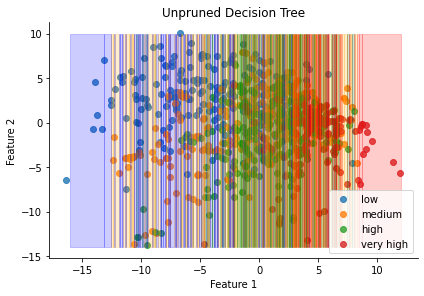

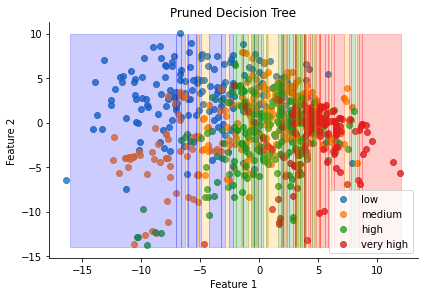

Accuracy for decision tree with max depth as 10 is 55.527638190954775


Decision boundary on the training set before and after pruning




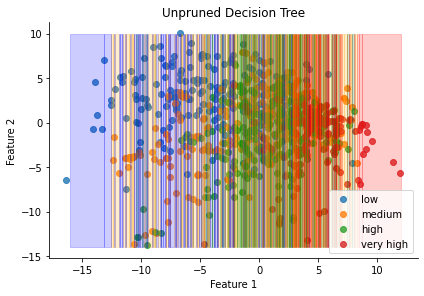

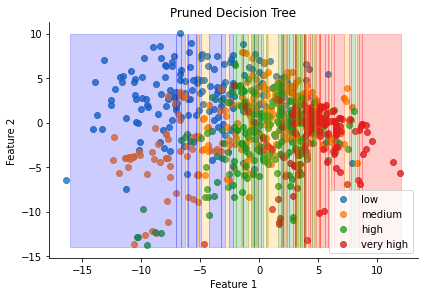

Accuracy for decision tree with max depth as 15 is 55.527638190954775


Decision boundary on the training set before and after pruning




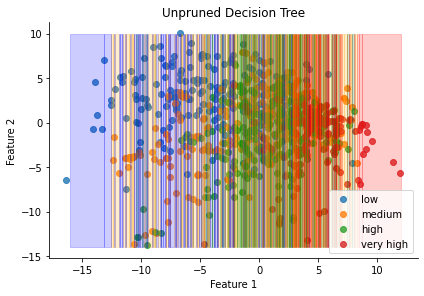

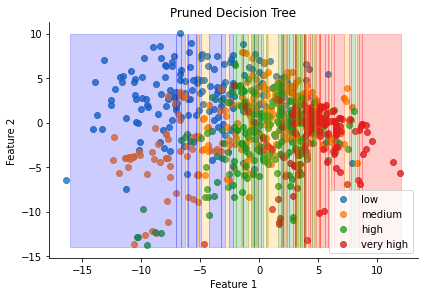

Accuracy for decision tree with max depth as 20 is 55.527638190954775


Decision boundary on the training set before and after pruning




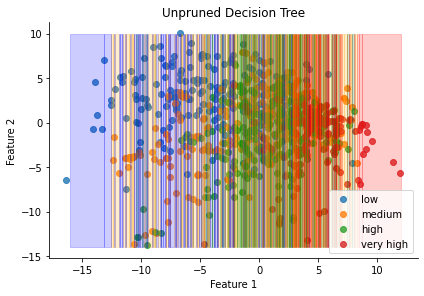

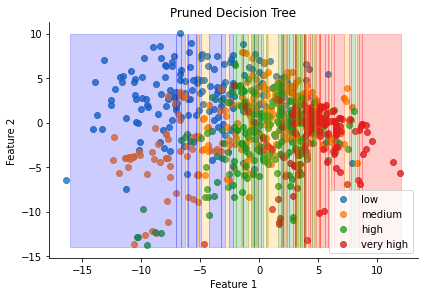

Accuracy for decision tree with max depth as 30 is 55.527638190954775


In [139]:
depth_array = [3,5,8,10,15,20,30]
accuracy_array = []
predictions_array = []

for depth_val in depth_array:
    plt.close('all')
    
    # generate the decision tree
    tree = decision_tree_algorithm(train_set_new,counter=0,min_samples=2,max_depth=depth_val)
    # do pruning of decision tree obtained
    pruned_tree = post_pruning(tree,train_set_new,val_set)
    
    # plot decision boundaries
    print("\n================================================\n")
    print("Decision boundary on the training set before and after pruning\n\n")
    
    create_plot(train_set_new,tree,"Unpruned Decision Tree")
    plt.pause(1)
    create_plot(train_set_new,pruned_tree,"Pruned Decision Tree")
    plt.pause(1)
    
    # find accuracy on test dataset after pruning
    y_predicted = make_predictions(x_test,pruned_tree)
    predictions_array.append(y_predicted)
    acc_val = calculate_accuracy(y_predicted,y_test)*100
    
    print(f"Accuracy for decision tree with max depth as {depth_val} is {acc_val}")
    accuracy_array.append(acc_val)

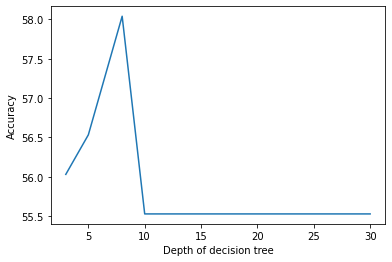

In [140]:
# to find highest accuracy
plt.plot(depth_array,accuracy_array)
plt.xlabel("Depth of decision tree")
plt.ylabel("Accuracy")
plt.show()

In [141]:
# finding highest accuracy
max_index = 0
highest_accuracy = accuracy_array[0]

for i in range(len(accuracy_array)):
    if accuracy_array[i] > highest_accuracy:
        highest_accuracy = accuracy_array[i]
        max_index = i

best_predictions = predictions_array[max_index]

## ```Visualizing results predicted by Decision Tree with actual values```

In [142]:
def plot_scatter_plot(values,title):
    for ind in range(len(best_predictions)):
        if(np.array(values)[ind] == 1):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='yellow')
        elif(np.array(values)[ind] == 2):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='green')
        elif(np.array(values)[ind] == 3):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='blue')
        else:
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='red')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(["low","medium","high","very high"])
    plt.title(title)
    plt.show()

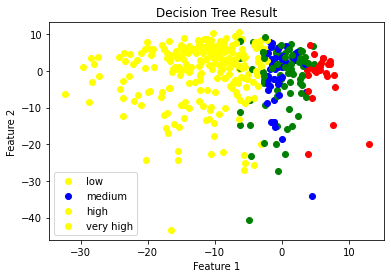

In [143]:
# plotting scatter plot for prediction made by Decision Tree using first 2 features of test data set
plot_scatter_plot(best_predictions,"Decision Tree Result")

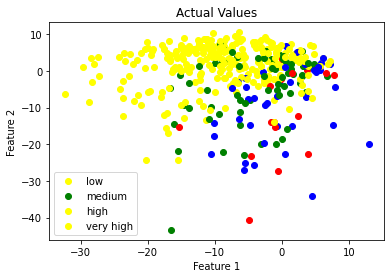

In [144]:
# plotting scatter plot for actual values of data points using first 2 features of test data set
plot_scatter_plot(y_test,"Actual Values")

# ```Classification Report for Decision Tree Model```

Test Result:
Accuracy Score: 58.04%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0        2.0        3.0        4.0  accuracy   macro avg  \
precision    0.820833   0.294872   0.120000   0.166667  0.580402    0.350593   
recall       0.729630   0.333333   0.142857   0.294118  0.580402    0.374984   
f1-score     0.772549   0.312925   0.130435   0.212766  0.580402    0.357169   
support    270.000000  69.000000  42.000000  17.000000  0.580402  398.000000   

           weighted avg  
precision      0.627750  
recall         0.580402  
f1-score       0.601194  
support      398.000000  
_______________________________________________
Confusion Matrix: 
 [[197  37  26  10]
 [ 29  23  13   4]
 [ 13  12   6  11]
 [  1   6   5   5]]



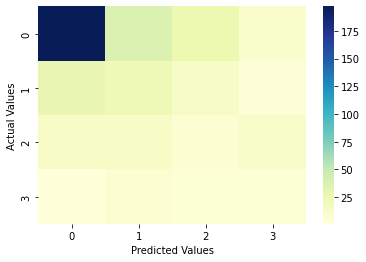

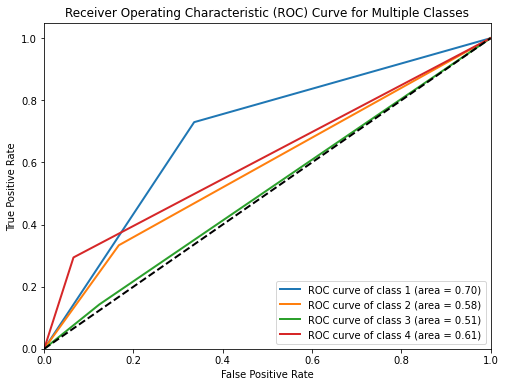

In [145]:
performance_metrics("Decision Tree",y_test,best_predictions)

# ```3. Adaboost```

Adaboost is one of the early successful algorithm wihtin the Boosting branch of Machine Learning.
 
- AdaBoost for classification is a supervised Machine Learning algo.
- It consists of iteratively training multiple stumps using feature data $x$ and target label $y$
- After training, the model's ovearll prefictions come from a weighted sum of the stumps predictions

- For instances, consider $n$ stumps, $P_i$ be the prediction of $i_{th}$ stump. whose corresponding weight is $w_{i}$ then:


$$
\text{Final Adaboost Prediction} = w_{{stump}1}*P{1} + w_{{stump}2}*P{2} + ... + w_{{stump}n}*P{n}
$$


### Algorithm of Adaboost

- AdaBoost trains a sequence of models with augmented sample weights generating 'confidence' coefficients $\alpha$ for each individual classifiers based on errors.

1. For a datset with N number of samples, we initialize weight of each data point with $w_i$ = $\frac{1}{N}$ . The weight of a datapoint represents the probability of selecting it during sampling. 


2. Training Weak Clasifiers: After sampling the dataset, we train a weak classifier $K_m$ using the training dataset. Here $K_m$ is just a decision tree stump

- For $m$ = 1 to $M$: 
- sample the dataset using the weights $w_{i}^{(m)}$ to obtain the training samples $x_{i}$
- Fit a classifier $K_m$ using all the training samples $x_i$
- Here $K_m$ is the prediction of $m_{th}$ stump

3. Calcuating Update Parameters from Error: Stumps in AdaBoost progressively learn from previous stump's mistakes through adjusting the weights of the dataset to accomodate the mistakes made by stumps at each iteration. 
- The weights of the misclassified data will be increased, and the weights of correctly classified data will be decreased. 
- As a result, as we go into further iterations, the training data will mostly comprise of data that is often misclassified by our stumps. 
- When data is misclassified, $y*K_m(x) = -1$, then the weight update will be positive and the weights will exponentially increase for that data. When the data is correctly satisfied, $y*K_m(x) = 1$, the opposite happens.


- Let $\epsilon$ be the ratio of sum of weights for misclassified samples to that of the total sum of weights for samples. Compute the value of $\epsilon$ as follows:

$$
\epsilon = \frac{\sum_{y_i \neq K_m(x_i)}w_i^{(m)}}{\sum_{y_i}w_i^{(m)}}
$$


- In the above equation, $y_i$ is the ground truth value of the target varibale and $w_i^{(m)}$ is the weight of the sample $i$ at iteration $m$
- Larger $\epsilon$ means largers misclassification percentage, makes the confidence $\alpha_m$ decrease exponentially.
- Let confidence that the AdaBoost places on $m_{th}$ stump's ability to classify the data be $\alpha_m$. Compute $\alpha_m$ value as follows:


$$
\alpha_{m} = \frac{1}{2}\log{(\frac{1-\epsilon}{\epsilon}})
$$


- Update all the weights as follows:
$$
w_{i}^{(m+1)} = w_{i}^{(m)}.e^{-\alpha_myK_m(x)} 
$$


4. New predictions can be computed by 
$$
K(x) = sign[\sum_{m=1}^{M}\alpha_{m}.K_{m}(x)]
$$

- Low error means the $\alpha$ value is larger, and thus has higher importance in voting.

- AdaBoost predicts on -1 or 1. As long as the weighted sum is above 0, it predicts 1, else, it predicts -1.

## ```3.1 Implementation of the Model```

In [146]:
# class for decision stump
class DecisionStump:
    # constructor will initialize value, feature_ind to split at, and threshold and alpha for this stump
    def __init__(self):
        self.value = 1
        self.feature_ind = None
        self.threshold = None
        self.alpha = None

    # function to predict outcome for this particular stump
    def predict(self,x_train):
        n_samples = x_train.shape[0]
        x_train_column = x_train[:, self.feature_ind]
        predictions = np.ones(n_samples)
        
        if self.value == 1:
            predictions[x_train_column < self.threshold] = -1
        else:
            predictions[x_train_column > self.threshold] = -1

            
        return predictions

In [147]:
# class for implementing binary adaboost classifier
class Adaboost:
    
    # n_clf are the number of decision stumps, clfs will store each of the classifier
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []
        
    def train_model(self,x_train,y_train):
        n_samples, n_features = x_train.shape

        # initialize weights to 1/N
        w = []
        for i in range(n_samples):
            w.append(1/n_samples)
        w = np.array(w)
            
        # to store each decision stump
        self.clfs = []

        # iterate through classifiers
        for i in range(self.n_clf):

            # initializing a new decision stump
            clf = DecisionStump()
            min_error = float("inf")

            # finding best feature and threshold value
            for feature_i in range(n_features):
                
                x_train_column = x_train[:,feature_i]
                thresholds = np.unique(x_train_column)

                for threshold in thresholds:
                    # predict with value 1
                    p = 1
                    
                    # initializing predictions to 1
                    predictions = np.ones(n_samples)
                    predictions[x_train_column < threshold] = -1

                    # calculating error
                    misclassified = w[y_train != predictions]
                    error = sum(misclassified)/sum(w)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.value = p
                        clf.threshold = threshold
                        clf.feature_ind = feature_i
                        min_error = error

            # calculate alpha
            epsilon = 1e-10 # to prevent divide by 0
            clf.alpha = 0.5 * np.log((1.0 - (min_error + epsilon)) / (min_error + epsilon))

            # calculate predictions and update weights
            predictions = clf.predict(x_train)
            w *= np.exp(-clf.alpha * y_train * predictions)

            # Save classifier
            self.clfs.append(clf)
            
    # function to find output
    def decision_function(self,x_train):
        clf_preds = [clf.alpha * clf.predict(x_train) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        return y_pred
    
    # function to classify
    def predict(self, x_train):
        return np.sign(self.decision_function(x_train))
    

In [148]:
class MulticlassAdaboost:
    
    # initializing classifiers array
    def __init__(self,n_stumps):
        self.classifiers = []
        self.n_stumps = n_stumps

    def train_model(self, x_train, y_train):
        self.classes = np.unique(y_train)
        self.classifiers = []

        for i, class_label in enumerate(self.classes):
            # treating the current class as positive and the rest as negative
            binary_labels = np.where(y_train == class_label, 1, -1)
            
            # create a binary Adaboost classifier
            # n_clf is number of stumps in that classifier
            classifier = Adaboost(n_clf=self.n_stumps)
            
            # training the ith classifier
            classifier.train_model(x_train, binary_labels)
            self.classifiers.append(classifier)
            
    # to predict the output
    def predict(self,x_test):
        
        # for each binary classifier, get the raw decision scores
        decision_scores = np.array([clf.decision_function(x_test) for clf in self.classifiers])

        # Choose the class with the highest decision score as the final prediction
        predictions = np.argmax(decision_scores, axis=0)+1 # to adjust the 0 based indexing
        return predictions

In [149]:
def find_accuracy(y_true,y_pred):
    count = 0
    for ind in range(len(y_true)):
        if y_pred[ind] == y_true[ind]:
            count += 1
    
    return count/len(y_true)

# ```Training Multiclass Adaboost Model```

In [150]:
# creating instance of that class
multiclass_adaboost = MulticlassAdaboost(n_stumps = 5)
multiclass_adaboost.train_model(np.array(x_train), np.array(y_train))

In [151]:
# finding predictions
y_pred = multiclass_adaboost.predict(np.array(x_test))

In [152]:
# finding accuracy for this machine learning model
print(find_accuracy(y_test,y_pred))

0.48743718592964824


## ```3.2 Insights drawn (plots, markdown explanations)```

## ```Comparing Accuracy of Adaboost for different number of decision stumps```

In [153]:
num_decision_stumps = [1,3,5,7,8,10,15,20,25,30,50]
accuracy_array = []
predictions_array = []

for val in num_decision_stumps:
    # creating object for this class
    multiclass_adaboost = MulticlassAdaboost(n_stumps = val)
    multiclass_adaboost.train_model(np.array(x_train), np.array(y_train))
    
    y_pred = multiclass_adaboost.predict(np.array(x_test))
    predictions_array.append(y_pred)
    
    acc_val = find_accuracy(y_test,y_pred)
    accuracy_array.append(acc_val)
    
    print(f"Accuracy for Adaboost with {val} decision stumps is: {acc_val}\n")

Accuracy for Adaboost with 1 decision stumps is: 0.4321608040201005

Accuracy for Adaboost with 3 decision stumps is: 0.4949748743718593

Accuracy for Adaboost with 5 decision stumps is: 0.48743718592964824

Accuracy for Adaboost with 7 decision stumps is: 0.5025125628140703

Accuracy for Adaboost with 8 decision stumps is: 0.5100502512562815

Accuracy for Adaboost with 10 decision stumps is: 0.5251256281407035

Accuracy for Adaboost with 15 decision stumps is: 0.5

Accuracy for Adaboost with 20 decision stumps is: 0.507537688442211

Accuracy for Adaboost with 25 decision stumps is: 0.5

Accuracy for Adaboost with 30 decision stumps is: 0.5050251256281407

Accuracy for Adaboost with 50 decision stumps is: 0.4899497487437186



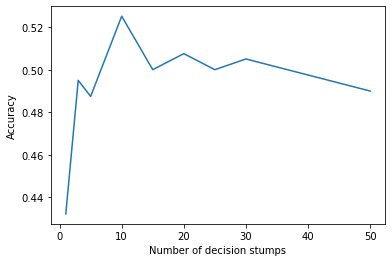

In [154]:
plt.plot(num_decision_stumps,accuracy_array)
plt.xlabel("Number of decision stumps")
plt.ylabel("Accuracy")
plt.show()

In [155]:
# finding highest accuracy
max_index = 0
highest_accuracy = accuracy_array[0]

for i in range(len(accuracy_array)):
    if accuracy_array[i] > highest_accuracy:
        highest_accuracy = accuracy_array[i]
        max_index = i

best_predictions = predictions_array[max_index]

## ```Visualizing results predicted by Adaboost with actual values```

In [156]:
def plot_scatter_plot(values,title):
    for ind in range(len(best_predictions)):
        if(np.array(values)[ind] == 1):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='yellow')
        elif(np.array(values)[ind] == 2):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='green')
        elif(np.array(values)[ind] == 3):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='blue')
        else:
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='red')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(["low","medium","high","very high"])
    plt.title(title)
    plt.show()

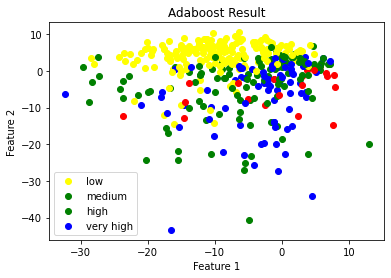

In [157]:
# plotting scatter plot for prediction made by Adaboost using first 2 features of test data set
plot_scatter_plot(best_predictions,"Adaboost Result")

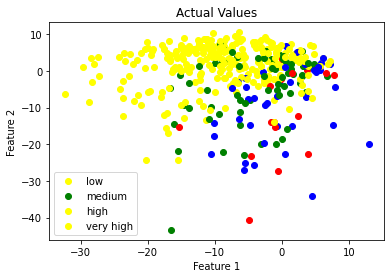

In [158]:
# plotting scatter plot for actual values of data points using first 2 features of test data set
plot_scatter_plot(y_test,"Actual Values")

## ```Classification Report for Adaboost Model```

Test Result:
Accuracy Score: 52.51%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0        2.0        3.0        4.0  accuracy   macro avg  \
precision    0.917582   0.206897   0.162500   0.250000  0.525126    0.384245   
recall       0.618519   0.347826   0.309524   0.294118  0.525126    0.392497   
f1-score     0.738938   0.259459   0.213115   0.270270  0.525126    0.370446   
support    270.000000  69.000000  42.000000  17.000000  0.525126  398.000000   

           weighted avg  
precision      0.686176  
recall         0.525126  
f1-score       0.580305  
support      398.000000  
_______________________________________________
Confusion Matrix: 
 [[167  66  31   6]
 [ 11  24  30   4]
 [  4  20  13   5]
 [  0   6   6   5]]



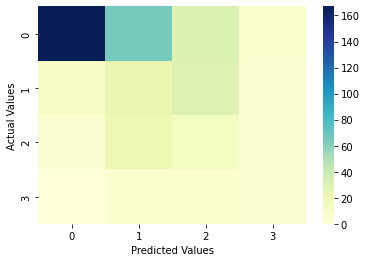

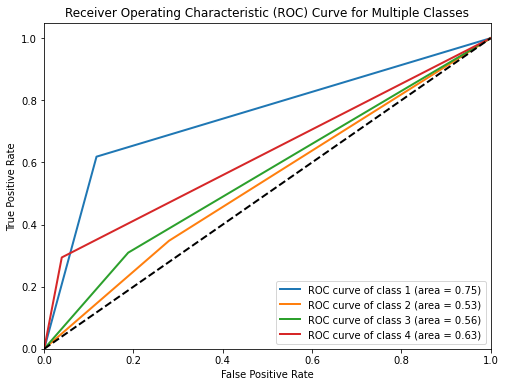

In [159]:
performance_metrics("Adaboost",y_test,best_predictions)

# ```4. Multiclass SVM```

- Aim is to find optimal hyperplane for data points that maximizes the margin.


- We will get output as set of weights, one for each feature, whose linear combination predicts the value of target attribute.


- To maximize the margin, we reduce the number of weights that are non-zero to a few.

<br>

![svm](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

<br>

- We solve the following constraint optimization problem

$$
\max_{w, b} \frac{2}{\|w\|} \space\space\space \text{such that} \space\space\space \forall i: y_i (w \cdot x_i + b) \geq 1
$$

- which can be written as, 

$$
\min_{w, b} \frac{\|w\|^{2}}{2} \space\space\space \text{such that} \space\space\space \forall i: y_i (w \cdot x_i + b) \geq 1
$$

- Corresponding Lagrangian is

$$
\mathcal{L}(w, b, \alpha_{i}) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{N} \alpha_i [y_i (w \cdot x_i + b) - 1 ]
\space\space\space \forall i: \alpha_i \geq 0
$$

- The above indicates primal form of optimization problem, for which we can write equivalent Lagrangian Dual Problem


$$
\max_{\alpha} \left[ \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) \right]
\space\space\space \text{such that} \space\space \forall i: \alpha_i \geq 0 \space \text{and} \space \sum_{i=1}^{N} \alpha_i y_i = 0
$$


- The dual optimization problem for the SVM is a quadratic programming problem. The solution to this quadratic programming problem yields the Lagrange multipliers for each point in the dataset.


- The weight vector is given by

$$
w = \sum_{i=1}^{N} \alpha_i y_i x_i
$$

- And bias term is

$$
b = y_i - \sum_{j=1}^{N} \alpha_j y_j (x_j \cdot x_i)
$$

- Only points with α > 0 define the hyperplane (contribute to the sum). These are called support vectors.


$$
y = \text{sign}\left(\sum_{i \in \text{SV}} \alpha_i y_i (x_i \cdot x) + b\right)
$$

- Here, α are the Lagrange multipliers, y are the class labels of the support vectors, x are the support vectors, x is the new example, and b is the bias term.

## ```Kernel Transformation```

- When the decision boundary between classes is not linear in the input feature space, we use non-linear Support Vector Machines (SVM) in which we use Kernel functions to map non-linear model in input space to a linear model in higher dimensional feature space.


- The kernel trick allows the SVM to operate in this higher-dimensional space without explicitly computing the transformation.


- The general form of the decision function in a non-linear SVM is


$$
y = \text{sign}\left(\sum_{i \in \text{SV}}^{N} \alpha_i y_i K(x_i, x) + b\right)
$$

- We will use the following Kernel functions


    - Linear Kernel

$$
K(x_i, x_j) = x_i \cdot x_j
$$

    - Polynomial Kernel
   
$$
K(x_i, x_j) = (1 + x_i \cdot x_j)^p
$$

    - Radial Basis Function (RBF) or Gaussian Kernel
    
$$
K(x_i, x_j) = \exp\left(-\frac{1}{2\sigma^2} \|x_i - x_j\|^2\right)
$$



## ```4.1 Implementation of the Model```

In [160]:
# defining kernel functions

# linear kernel
def linear_kernel(xi,xj,dummy1=1,dummy2=1):
    return xi.dot(xj.T)
    
# polynomial kernel function
def polynomial_kernel(xi,xj,p=2,dummy=1):
    return (1 + xi.dot(xj.T))**p

# gaussian kernel function
def gaussian_kernel(xi,xj,dummy=1,sigma=0.1):
    return np.exp(-0.5*(1 /sigma ** 2) * np.linalg.norm(xi[:, np.newaxis] - xj[np.newaxis, :], axis=2) ** 2)

In [161]:
class Support_Vector_Machine:
   
    # initial constructor for SVM class
    def __init__(self, kernel='polynomial', degree=2, sigma=0.1, epoches=5000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate
        self.kernel = kernel
        
        if self.kernel == 'linear':
            self.kernel = linear_kernel
        elif self.kernel == 'polynomial':
            self.kernel = polynomial_kernel
        elif self.kernel == 'gaussian':
            self.kernel =  gaussian_kernel
            
    # function for training binary SVM Model
    def train(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.alpha = np.random.random(x_train.shape[0])
        self.b = 0
        self.ones = np.ones(x_train.shape[0])
        
        # calculating yi*yj*K(xi, xj)
        y_mul_kernal = np.outer(y_train,y_train) * self.kernel(x_train,x_train,self.degree,self.sigma)
        
        # performing gradient descent
        for i in range(self.epoches):
            
            # 1 – yk ∑αj*yj*K(xj, xk)
            gradient = self.ones - y_mul_kernal.dot(self.alpha) 
            
            # α = α + η*(1 – yk ∑αj*yj*K(xj, xk)) to maximize
            self.alpha += self.learning_rate * gradient 
            
            # checking if 0<α<C
            self.alpha[self.alpha < 0] = 0
            self.alpha[self.alpha > self.C] = self.C 
            
            # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) 
           
            alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
       
        # for intercept b, we will only consider α which are 0<α<C
        b_values = []        
        for index in alpha_index:
            b_values.append(y_train[index] - (self.alpha * y_train).dot(self.kernel(x_train, x_train[index])))
            
        # finding b value
        # take mean or average of yi – ∑αj*yj*K(xi,xj)
        self.b = np.mean(b_values) 
        
    # function to predict values
    def decision_function(self,x_test):
        return (self.alpha * self.y_train).dot(self.kernel(self.x_train, x_test)) + self.b

## ```Training Multiclass SVM Model```

In [162]:
def find_predictions(kernel='linear',degree=2):
    
    # finding unique classes
    unique_classes = np.unique(y_train)
    # to store predictions made by each of the model
    dictionary_of_models = {}
    predictions = []
    
    # we will iterate over each class and train one vs rest model for that class
    # points belonging to that class will be labeled as 1 and rest as -1
    for index in unique_classes:
        class_label = []  # Reset class_label for each class
        for label in y_train:
            if label == index:
                class_label.append(1)
            else:
                class_label.append(-1)
                
        # creating instance of model
        svm_model = Support_Vector_Machine(kernel=kernel,degree=degree)
        
        # training svm model for class index vs rest
        svm_model.train(np.array(x_train),class_label)
        
        # adding predictions
        predictions.append(svm_model.decision_function(np.array(x_test)))
        
    return predictions

In [163]:
def find_final_predictions(kernel='linear',degree=2):
    predictions = find_predictions(kernel,degree=degree)
    
    # finding final predictions
    predictions = np.array(predictions).T
    final_predictions = np.argmax(predictions, axis=1) + 1  # Add 1 to align with class labels
    
    return final_predictions

In [164]:
# function to find accuracy
def give_accuracy(y_test,y_pred):
    count = 0
    for i in range(len(y_test)):
        if(y_test[i]==y_pred[i]):
            count+=1

    accuracy = count/len(y_test)
    return accuracy

## ```4.2 Insights drawn (plots, markdown explanations)```

# ```Comparing Accuracy with different Kernel functions```

In [165]:
accuracy_overall = []
predictions_array_overall = []

## ```Linear Kernel Function```

In [166]:
final_predictions = find_final_predictions('linear')
predictions_array_overall.append(final_predictions)
accuracy = give_accuracy(y_test,final_predictions)
accuracy_overall.append(accuracy)
print("Accuracy for SVM with linear kernel is: ",accuracy)

Accuracy for SVM with linear kernel is:  0.6030150753768844


## ```Polynomial Kernel Function```

In [167]:
accuracy_array = []
predictions_array = []
degree_array = [2,3,4,5,10,20]

for degree_val in degree_array:
    final_predictions = find_final_predictions('polynomial',degree=degree_val)
    predictions_array.append(final_predictions)
    accuracy = give_accuracy(y_test,final_predictions)
    accuracy_array.append(accuracy)
    print(f"Accuracy for SVM with polynomial kernel (degree={degree_val}) is: {accuracy}")

Accuracy for SVM with polynomial kernel (degree=2) is: 0.44974874371859297
Accuracy for SVM with polynomial kernel (degree=3) is: 0.47738693467336685
Accuracy for SVM with polynomial kernel (degree=4) is: 0.44974874371859297
Accuracy for SVM with polynomial kernel (degree=5) is: 0.46984924623115576
Accuracy for SVM with polynomial kernel (degree=10) is: 0.4723618090452261
Accuracy for SVM with polynomial kernel (degree=20) is: 0.5025125628140703


[]

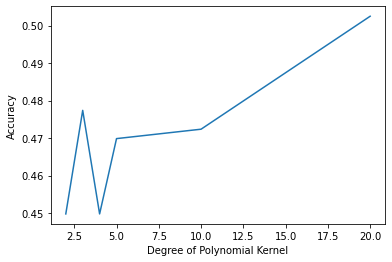

In [168]:
plt.plot(degree_array,accuracy_array)
plt.xlabel("Degree of Polynomial Kernel")
plt.ylabel("Accuracy")
plt.plot()

In [169]:
# finding highest accuracy
max_index = 0
highest_accuracy = accuracy_array[0]

for i in range(len(accuracy_array)):
    if accuracy_array[i] > highest_accuracy:
        highest_accuracy = accuracy_array[i]
        max_index = i

best_predictions_polynomial = predictions_array[max_index]

In [170]:
accuracy_overall.append(accuracy_array[max_index])
predictions_array_overall.append(best_predictions_polynomial)

## ```Gaussian Kernel Function```

In [171]:
final_predictions = find_final_predictions('gaussian')
predictions_array_overall.append(final_predictions)
accuracy = give_accuracy(y_test,final_predictions)
accuracy_overall.append(accuracy)
print("Accuracy for SVM with gaussian kernel is: ",accuracy)

Accuracy for SVM with gaussian kernel is:  0.17336683417085427


In [172]:
# finding best prediction
max_index = 0
highest_accuracy = accuracy_overall[0]

for i in range(len(accuracy_overall)):
    if accuracy_overall[i] > highest_accuracy:
        highest_accuracy = accuracy_overall[i]
        max_index = i

best_predictions = predictions_array_overall[max_index]

## ```Visualizing results predicted by Multiclass SVM with actual values```

In [173]:
def plot_scatter_plot(values,title):
    for ind in range(len(best_predictions)):
        if(np.array(values)[ind] == 1):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='yellow')
        elif(np.array(values)[ind] == 2):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='green')
        elif(np.array(values)[ind] == 3):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='blue')
        else:
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='red')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(["low","medium","high","very high"])
    plt.title(title)
    plt.show()

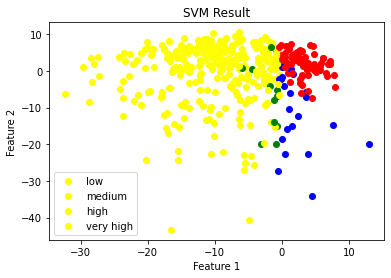

In [174]:
# plotting scatter plot for prediction made by SVM using first 2 features of test data set
plot_scatter_plot(best_predictions,"SVM Result")

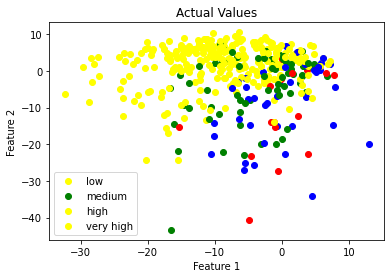

In [175]:
# plotting scatter plot for actual values of data points using first 2 features of test data set
plot_scatter_plot(y_test,"Actual Values")

## ```Classification Report for SVM Model```

Test Result:
Accuracy Score: 60.30%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0        2.0        3.0        4.0  accuracy   macro avg  \
precision    0.773196   0.230769   0.285714   0.082192  0.603015    0.342968   
recall       0.833333   0.043478   0.142857   0.352941  0.603015    0.343152   
f1-score     0.802139   0.073171   0.190476   0.133333  0.603015    0.299780   
support    270.000000  69.000000  42.000000  17.000000  0.603015  398.000000   

           weighted avg  
precision      0.598199  
recall         0.603015  
f1-score       0.582646  
support      398.000000  
_______________________________________________
Confusion Matrix: 
 [[225   7   3  35]
 [ 41   3   8  17]
 [ 19   2   6  15]
 [  6   1   4   6]]



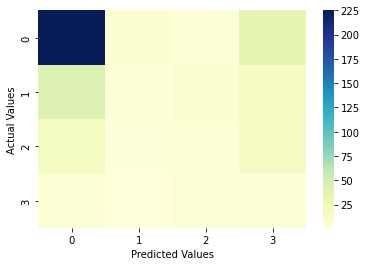

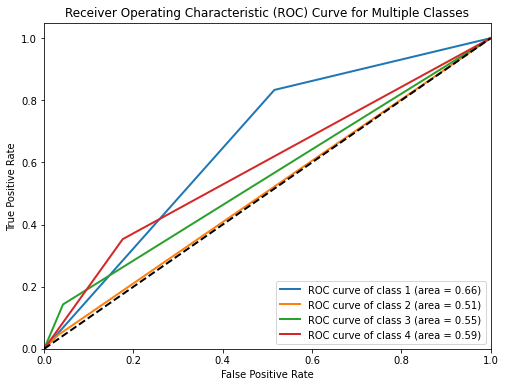

In [176]:
performance_metrics("SVM",y_test,best_predictions)

# ```Comparison of insights drawn from the models```

In [177]:
MLA_columns = ['Name', 'Test Accuracy', 'Precision', 'Recall']
MLA_compare = pd.DataFrame(columns=MLA_columns)
index = 0

# MLA_compare
count = 0
for val in MLA:
    MLA_compare.loc[count] = MLA[val]
    count += 1
MLA_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)
MLA_compare

,Name,Test Accuracy,Precision,Recall
2,SVM,60.301508,0.598199,0.603015
0,Decision Tree,58.040201,0.627750,0.580402
1,Adaboost,52.512563,0.686176,0.525126


# ```Test Accuracy Comparison```

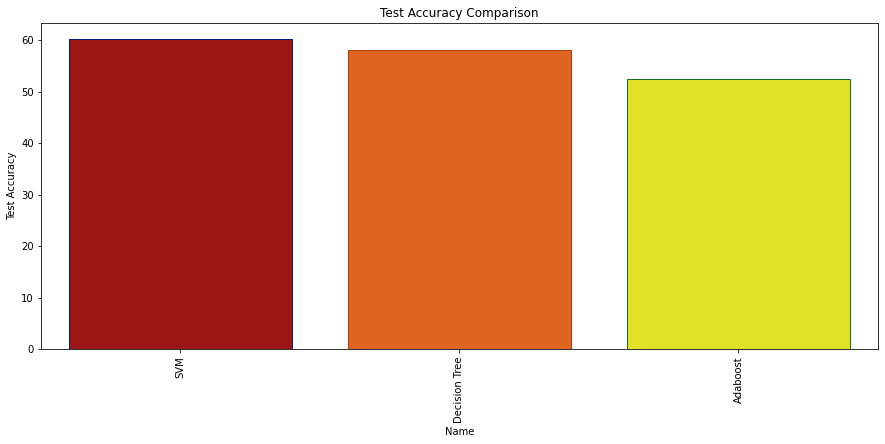

In [178]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Test Accuracy Comparison')
plt.show()

# ```Precision Comparison```

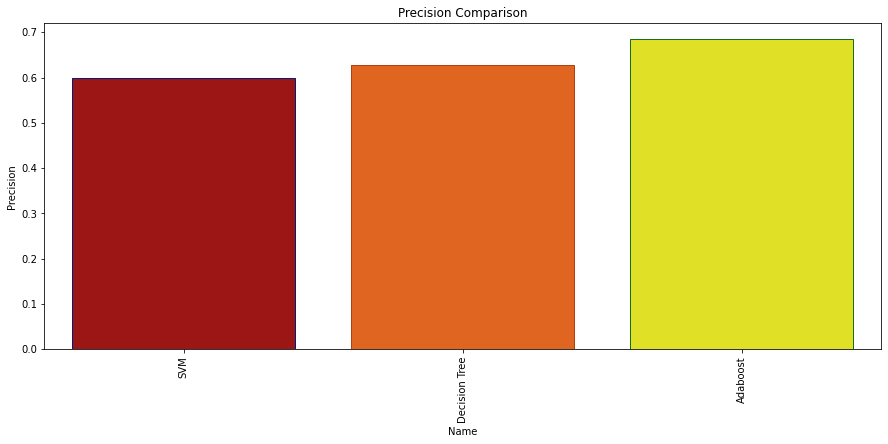

In [179]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Precision",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Precision Comparison')
plt.show()

# ```Recall Comparison```

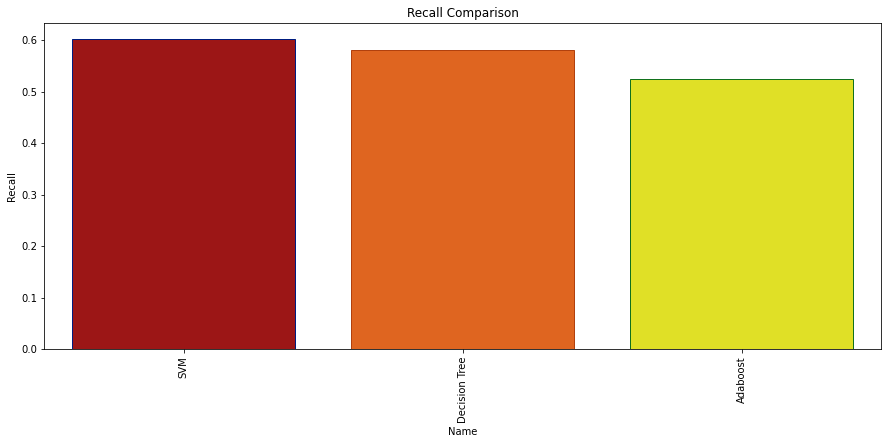

In [180]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Recall Comparison')
plt.show()

# Best Model

```As we can observe SVM has highest accuracy and recall score among other machine learning models, so SVM performs better than other models on this given dataset.```

# ```5. References```


- https://numpy.org/doc/stable/reference/generated/numpy.dot.html

- https://pandas.pydata.org/

- https://matplotlib.org/

- https://www.geeksforgeeks.org/machine-learning/

- https://seaborn.pydata.org/